In [210]:
# Importing modules needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

%matplotlib inline
sns.set_theme()

In [7]:
# Creating the Dataframe
data = pd.read_csv('autoscout24.csv')
data.head(10)

mileage        make    model               fuel       gear offerType  \
0   235000         BMW      316             Diesel     Manual      Used   
1    92800  Volkswagen     Golf           Gasoline     Manual      Used   
2   149300        SEAT     Exeo           Gasoline     Manual      Used   
3    96200     Renault   Megane           Gasoline     Manual      Used   
4   156000     Peugeot      308           Gasoline     Manual      Used   
5   147000      Toyota    Auris  Electric/Gasoline  Automatic      Used   
6    91894     Renault   Scenic             Diesel     Manual      Used   
7   127500        Opel   Zafira           Gasoline     Manual      Used   
8   115000       Mazda        3           Gasoline  Automatic      Used   
9      104        Ford  Transit             Diesel     Manual      Used   

   price     hp  year  
0   6800  116.0  2011  
1   6877  122.0  2011  
2   6900  160.0  2011  
3   6950  110.0  2011  
4   6950  156.0  2011  
5   6950   99.0  2011  
6   6970  131.0  2011  
7   6972  116.0  2011  
8   6980  150.0  2011  
9   6990   86.0  2011

In [218]:
# Renaming the columns of the Dataframe
data = data.rename(columns={'mileage': 'Kilometerstand', 'make': 'Hersteller', 'model': 'Modell', 'fuel': 'Kraftstoff', 'gear': 'Schaltung', 'offerType': 'Zustand', 'price': 'Preis', 'hp': 'PS', 'year': 'Jahr'})
data = data.dropna()
data = data[data['Jahr'] >= 2011]
data

Kilometerstand  Hersteller  Modell         Kraftstoff Schaltung  \
0              235000         BMW     316             Diesel    Manual   
1               92800  Volkswagen    Golf           Gasoline    Manual   
2              149300        SEAT    Exeo           Gasoline    Manual   
3               96200     Renault  Megane           Gasoline    Manual   
4              156000     Peugeot     308           Gasoline    Manual   
...               ...         ...     ...                ...       ...   
46400              99        Fiat     500  Electric/Gasoline    Manual   
46401              99        Fiat     500  Electric/Gasoline    Manual   
46402              99        Fiat     500  Electric/Gasoline    Manual   
46403              99        Fiat     500  Electric/Gasoline    Manual   
46404              99        Fiat     500  Electric/Gasoline    Manual   

              Zustand  Preis  PS  Jahr  
0                Used   6800 116  2011  
1                Used   6877 122  2011  
2                Used   6900 160  2011  
3                Used   6950 110  2011  
4                Used   6950 156  2011  
...               ...    ...  ..   ...  
46400  Pre-registered  12990  71  2021  
46401  Pre-registered  12990  71  2021  
46402  Pre-registered  12990  71  2021  
46403  Pre-registered  12990  71  2021  
46404  Pre-registered  12990  71  2021  

[46071 rows x 9 columns]

In [219]:
rows, columns = data.shape
print(rows)
print(columns)

46071
9


In [220]:
data.head(10)

Kilometerstand  Hersteller   Modell         Kraftstoff  Schaltung Zustand  \
0          235000         BMW      316             Diesel     Manual    Used   
1           92800  Volkswagen     Golf           Gasoline     Manual    Used   
2          149300        SEAT     Exeo           Gasoline     Manual    Used   
3           96200     Renault   Megane           Gasoline     Manual    Used   
4          156000     Peugeot      308           Gasoline     Manual    Used   
5          147000      Toyota    Auris  Electric/Gasoline  Automatic    Used   
6           91894     Renault   Scenic             Diesel     Manual    Used   
7          127500        Opel   Zafira           Gasoline     Manual    Used   
8          115000       Mazda        3           Gasoline  Automatic    Used   
9             104        Ford  Transit             Diesel     Manual    Used   

   Preis  PS  Jahr  
0   6800 116  2011  
1   6877 122  2011  
2   6900 160  2011  
3   6950 110  2011  
4   6950 156  2011  
5   6950  99  2011  
6   6970 131  2011  
7   6972 116  2011  
8   6980 150  2011  
9   6990  86  2011

In [221]:
data.describe()

Kilometerstand   Preis    PS  Jahr
count           46071   46071 46071 46071
mean            71233   16563   133  2016
std             62454   19280    75     3
min                 0    1100     1  2011
25%             19900    7490    86  2013
50%             60000   11000   116  2016
75%            105000   19490   150  2019
max           1111111 1199900   850  2021

In [222]:
pd.options.display.float_format = '{:.0f}'.format

In [223]:
def convert_to_float(value):
    return float(value)

In [224]:
data['Kilometerstand'] = data['Kilometerstand'].round(0).astype(int)
data['Preis'] = data['Preis'].round(0).astype(int)
data['PS'] = data['PS'].apply(convert_to_float)
data['Jahr'] = data['Jahr'].round(0).astype(int)
data.describe()

Kilometerstand   Preis    PS  Jahr
count           46071   46071 46071 46071
mean            71233   16563   133  2016
std             62454   19280    75     3
min                 0    1100     1  2011
25%             19900    7490    86  2013
50%             60000   11000   116  2016
75%            105000   19490   150  2019
max           1111111 1199900   850  2021

In [225]:
data.describe()

Kilometerstand   Preis    PS  Jahr
count           46071   46071 46071 46071
mean            71233   16563   133  2016
std             62454   19280    75     3
min                 0    1100     1  2011
25%             19900    7490    86  2013
50%             60000   11000   116  2016
75%            105000   19490   150  2019
max           1111111 1199900   850  2021

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kilometerstand  46071 non-null  int32  
 1   Hersteller      46071 non-null  object 
 2   Modell          46071 non-null  object 
 3   Kraftstoff      46071 non-null  object 
 4   Schaltung       46071 non-null  object 
 5   Zustand         46071 non-null  object 
 6   Preis           46071 non-null  int32  
 7   PS              46071 non-null  float64
 8   Jahr            46071 non-null  int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 3.0+ MB


1.2 Analyse

Wieviele Autos wurden verkauft? Über welchen Zeitraum? --> shape + rows für Anzahl, Zeitraum = min - max Jahr

Welche Marken sind Erfasst? --> Kategorische Daten Hersteller und Modell

Existieren Korrelation zwischen den numerischen Features? (scatterplot von describe features)

Gibt es Veränderungen über die Jahre? 


1.3 Machine Learning

X = Top 5 Hersteller

Wie teuer war durschschnittzlich ein Auto von Hersteller X 

Trainiere ein Modell deiner Wahl, z.b: LinReg, um ausgehend von Features deiner Wahl den Verkaufspreis eines Autos vorherzusagen.

Welche kategorie von Machine Learning ist dieses Problem?

Wie wird die Güte des Modells evaluiert? Was ist die Fehlermetrik?

andere Modelle?

1.4 
Streamlit Dashboard bauen um Ergebnisse visuell dazustellen

In [227]:
# 1.2 Wieviele Autos wurden verkauft?

rows, columns = data.shape
print(f"Es wurden {rows} Autos verkauft.")
print(columns)

Es wurden 46071 Autos verkauft.
9


In [228]:
data.describe()

Kilometerstand   Preis    PS  Jahr
count           46071   46071 46071 46071
mean            71233   16563   133  2016
std             62454   19280    75     3
min                 0    1100     1  2011
25%             19900    7490    86  2013
50%             60000   11000   116  2016
75%            105000   19490   150  2019
max           1111111 1199900   850  2021

In [229]:
# 1.2  Über welchen Zeitraum? 
print(data['Jahr'].min())
print(data['Jahr'].max())
print(f"Es wurden {rows} Autos im Zeitraum von {data['Jahr'].min()} bis {data['Jahr'].max()} verkauft")

2011
2021
Es wurden 46071 Autos im Zeitraum von 2011 bis 2021 verkauft


In [230]:
# 1.2 Welche Marken sind Erfasst?

unique_hersteller = data['Hersteller'].unique()
for i in unique_hersteller:
    print(i)

BMW
Volkswagen
SEAT
Renault
Peugeot
Toyota
Opel
Mazda
Ford
Mercedes-Benz
Chevrolet
Audi
Fiat
Kia
Dacia
MINI
Hyundai
Skoda
Citroen
Infiniti
Suzuki
SsangYong
smart
Cupra
Volvo
Jaguar
Porsche
Nissan
Honda
Mitsubishi
Lexus
Jeep
Maserati
Bentley
Land
Alfa
Subaru
Dodge
Microcar
Lamborghini
Lada
Tesla
Chrysler
McLaren
Aston
Rolls-Royce
Lancia
Abarth
DS
Daihatsu
Ligier
Ferrari
Aixam
Zhidou
Morgan
Maybach
RAM
Alpina
Polestar
Brilliance
Piaggio
FISKER
Others
Cadillac
Iveco
Isuzu
Corvette
Baic
DFSK
Estrima
Alpine


In [231]:
data_num = data.drop(columns=['Hersteller', 'Modell', 'Kraftstoff', 'Schaltung', 'Zustand'])
data_num.head(10)

Kilometerstand  Preis  PS  Jahr
0          235000   6800 116  2011
1           92800   6877 122  2011
2          149300   6900 160  2011
3           96200   6950 110  2011
4          156000   6950 156  2011
5          147000   6950  99  2011
6           91894   6970 131  2011
7          127500   6972 116  2011
8          115000   6980 150  2011
9             104   6990  86  2011

In [232]:
print("Existieren Korrelation zwischen den numerischen Features?")

Existieren Korrelation zwischen den numerischen Features?


C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


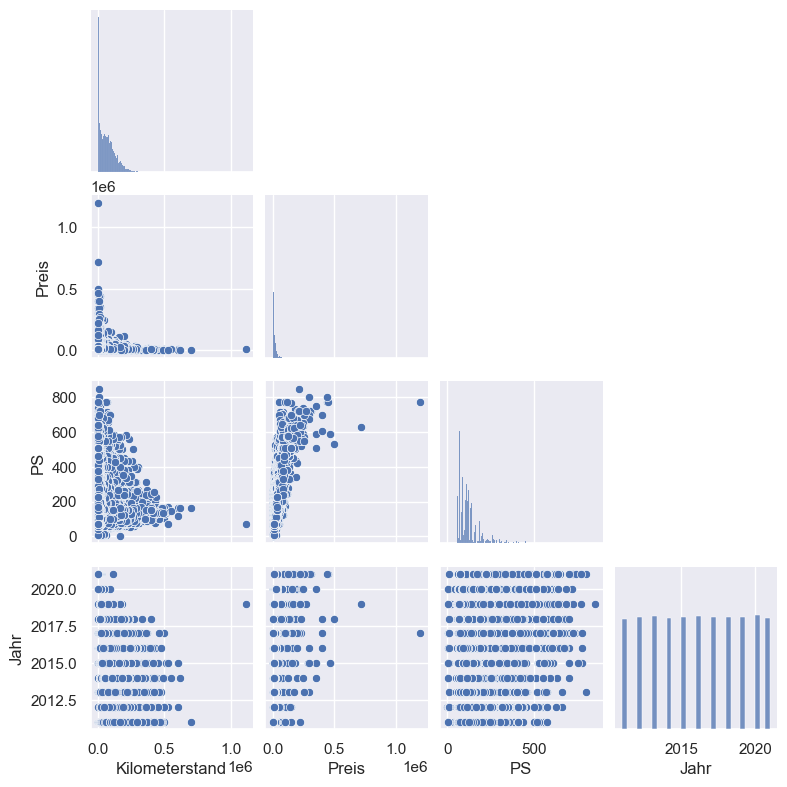

In [233]:
sns.pairplot(data=data_num, diag_kind='hist', height=2, corner=True, )

In [234]:
print("Kilometerstand, Preis und PS korrelieren alle mit dem Jahr.")
print("Preis und PS korrelieren miteinander negativ (mehr PS = teurer), PS und Kilometerstand korreleiren positiv (mehr PS = kleinerer Kilometerstand)")
print("Preis und Kilomterstand korreleiren miteinander (höherer kilometerstand = niedriger Preis)")

Kilometerstand, Preis und PS korrelieren alle mit dem Jahr.
Preis und PS korrelieren miteinander negativ (mehr PS = teurer), PS und Kilometerstand korreleiren positiv (mehr PS = kleinerer Kilometerstand)
Preis und Kilomterstand korreleiren miteinander (höherer kilometerstand = niedriger Preis)


<Axes: xlabel='Kilometerstand', ylabel='Preis'>

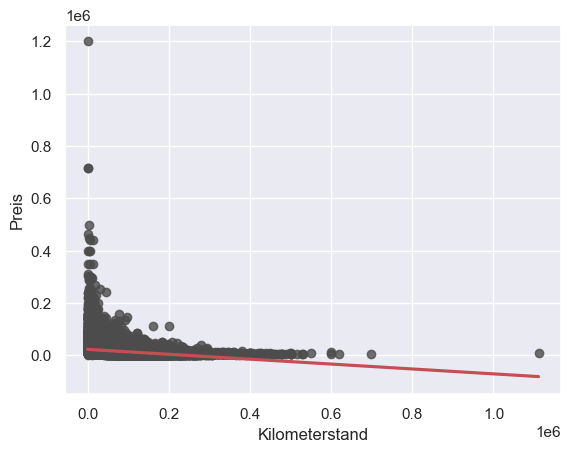

In [235]:
sns.regplot(data=data_num, x='Kilometerstand', y='Preis', line_kws=dict(color="r"), color=".3")

In [236]:
sns.regplot(data=data_num, x='Kilometerstand', y='PS', line_kws=dict(color="r"), color=".3")

<Axes: xlabel='Kilometerstand', ylabel='PS'>

In [237]:
sns.regplot(data=data_num, y='Kilometerstand', x='Jahr', order=2, line_kws=dict(color="r"), color=".3", fit_reg=True)

<Axes: xlabel='Jahr', ylabel='Kilometerstand'>

In [238]:
sns.regplot(data=data_num, x='PS', y='Preis', line_kws=dict(color="r"), color=".3")

<Axes: xlabel='PS', ylabel='Preis'>

<Axes: xlabel='Jahr', ylabel='Preis'>

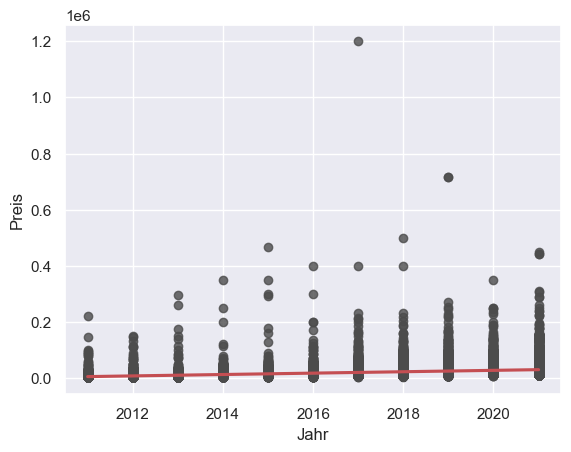

In [239]:
sns.regplot(data=data_num, x='Jahr', y='Preis', line_kws=dict(color="r"), color=".3")

<Axes: xlabel='Jahr', ylabel='PS'>

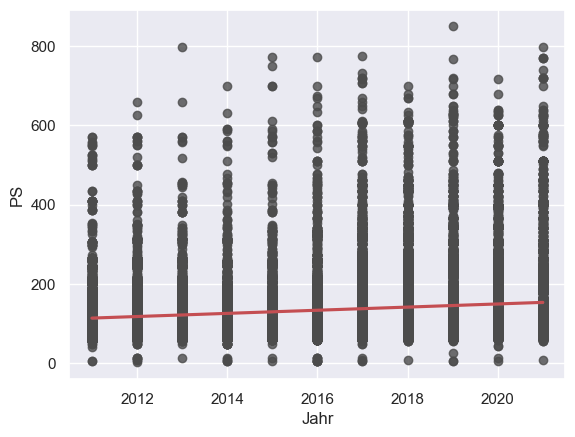

In [240]:
sns.regplot(data=data_num, x='Jahr', y='PS', line_kws=dict(color="r"), color=".3")

In [241]:
print("Gibt es Veränderungen über die Jahre?")

Gibt es Veränderungen über die Jahre?


<Axes: xlabel='Jahr', ylabel='Kilometerstand'>

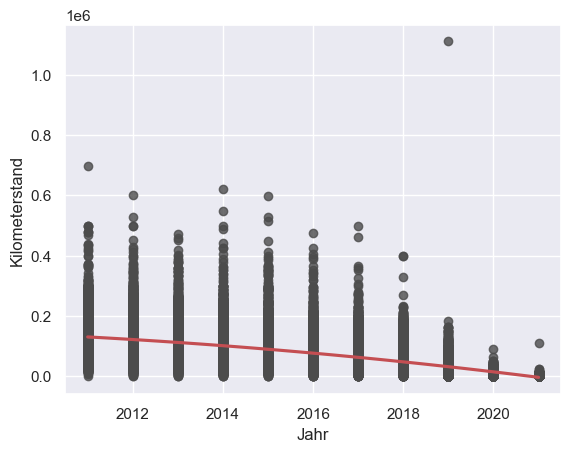

In [242]:
sns.regplot(data=data_num, y='Kilometerstand', x='Jahr', order=2, line_kws=dict(color="r"), color=".3", fit_reg=True)

<Axes: xlabel='Jahr', ylabel='Preis'>

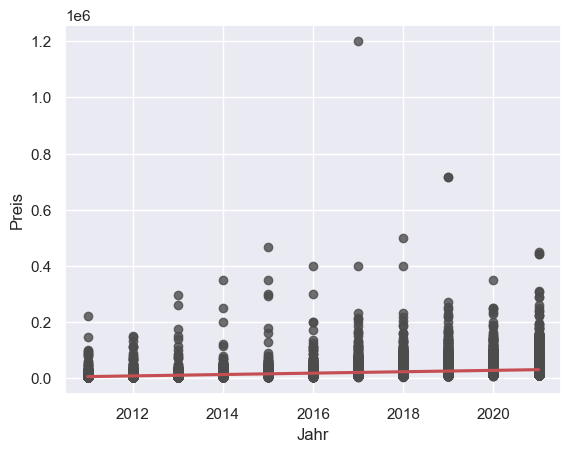

In [243]:
sns.regplot(data=data_num, x='Jahr', y='Preis', line_kws=dict(color="r"), color=".3")

<Axes: xlabel='Jahr', ylabel='PS'>

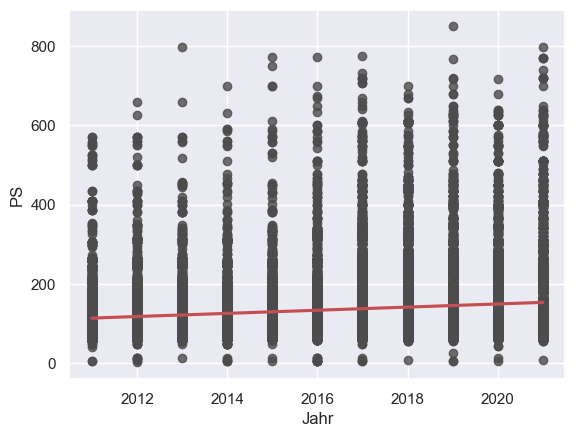

In [244]:
sns.regplot(data=data_num, x='Jahr', y='PS', line_kws=dict(color="r"), color=".3")

In [245]:
sns.lmplot(data = data_num, x='Jahr', y='Preis')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


1.3 Machine Learning

X = Top 5 Hersteller

Wie teuer war durschschnittzlich ein Auto von Hersteller X

Trainiere ein Modell deiner Wahl, z.b: LinReg, um ausgehend von Features deiner Wahl den Verkaufspreis eines Autos vorherzusagen.

Welche kategorie von Machine Learning ist dieses Problem?

Wie wird die Güte des Modells evaluiert? Was ist die Fehlermetrik?

andere Modelle?

In [246]:
# zählen und sortieren der top 5 hersteller
hersteller_count = data['Hersteller'].value_counts()
data_five = data[data['Hersteller'].isin(hersteller_count.index[:5])]
data_five.head(30)

Kilometerstand  Hersteller          Modell Kraftstoff  Schaltung Zustand  \
1            92800  Volkswagen            Golf   Gasoline     Manual    Used   
3            96200     Renault          Megane   Gasoline     Manual    Used   
6            91894     Renault          Scenic     Diesel     Manual    Used   
7           127500        Opel          Zafira   Gasoline     Manual    Used   
9              104        Ford         Transit     Diesel     Manual    Used   
10           59580        Opel          Meriva     Diesel  Automatic    Used   
11           84000  Volkswagen            Golf   Gasoline     Manual    Used   
15           72000  Volkswagen            Polo   Gasoline     Manual    Used   
16          190000     Renault          Espace     Diesel     Manual    Used   
17          190000     Renault    Grand Espace     Diesel     Manual    Used   
19           82000        Opel           Corsa   Gasoline     Manual    Used   
21           81970  Volkswagen            Golf   Gasoline     Manual    Used   
23          193333  Volkswagen    Cross Touran     Diesel     Manual    Used   
24          113000  Volkswagen          Beetle   Gasoline     Manual    Used   
25          117000  Volkswagen  Golf Cabriolet   Gasoline     Manual    Used   
27          104250        Opel           Astra   Gasoline     Manual    Used   
30          105000        Opel           Astra   Gasoline     Manual    Used   
31          114164        Ford           Focus   Gasoline     Manual    Used   
36           51200     Renault          Scenic   Gasoline     Manual    Used   
37          107000        Opel        Insignia     Diesel     Manual    Used   
40           73760        Opel          Zafira   Gasoline     Manual    Used   
41          113000  Volkswagen          Beetle   Gasoline     Manual    Used   
43            7400        Opel            Adam   Gasoline     Manual    Used   
45           86980        Ford           B-Max   Gasoline     Manual    Used   
46           98000  Volkswagen    Golf Variant     Diesel  Automatic    Used   
47           98988        Ford         Transit     Diesel     Manual    Used   
48           41124        Opel            Adam   Gasoline     Manual    Used   
49          170000  Volkswagen          Touran     Diesel     Manual    Used   
52          195327        Ford          Galaxy     Diesel     Manual    Used   
53          143316  Volkswagen          Touran   Gasoline  Automatic    Used   

    Preis  PS  Jahr  
1    6877 122  2011  
3    6950 110  2011  
6    6970 131  2011  
7    6972 116  2011  
9    6990  86  2011  
10   6990 101  2011  
11   6990 105  2011  
15   6999  60  2011  
16   6999 150  2011  
17   6999 150  2011  
19   7000 101  2011  
21   7850 105  2012  
23   7900 105  2012  
24   7900 105  2012  
25   7949 105  2012  
27   7950 140  2012  
30   7980 179  2012  
31   7990 125  2012  
36   8000 131  2012  
37   8000 160  2012  
40   8990 140  2013  
41   8990 160  2013  
43   8990 101  2013  
45   8995 120  2013  
46   8999 105  2013  
47   8999 101  2013  
48   8999 101  2013  
49   8999 140  2013  
52   9000 140  2013  
53   9000 140  2013

In [247]:
for i in hersteller_count.index[:5]:
    print(i)

Volkswagen
Opel
Ford
Skoda
Renault


In [248]:
sns.pairplot(data = data_five, corner=True,)

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [249]:
sns.lmplot(data = data_five, x='Jahr', y='Preis')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


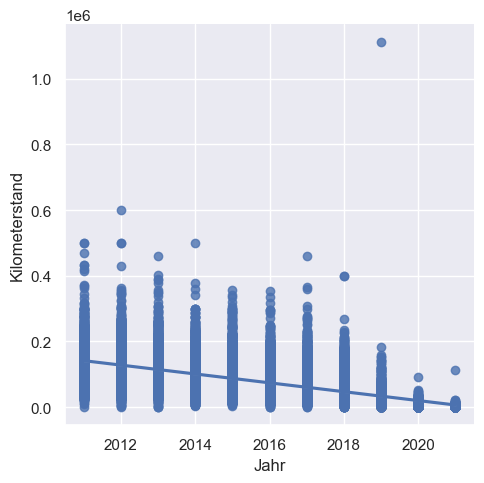

In [250]:
sns.lmplot(data = data_five, x='Jahr', y='Kilometerstand')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


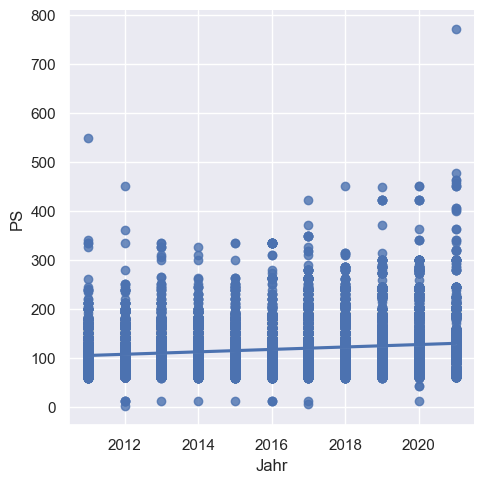

In [251]:
sns.lmplot(data = data_five, x='Jahr', y='PS')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


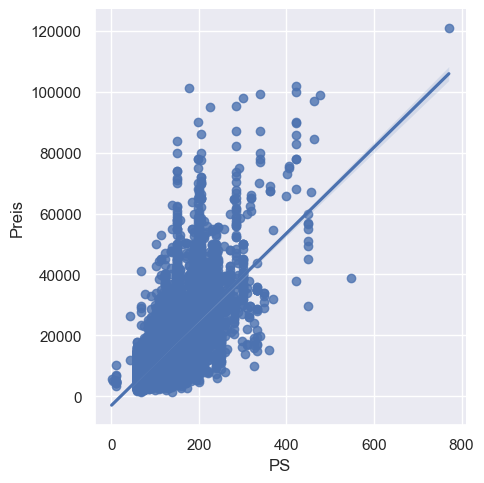

In [252]:
sns.lmplot(data = data_five, x='PS', y='Preis')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


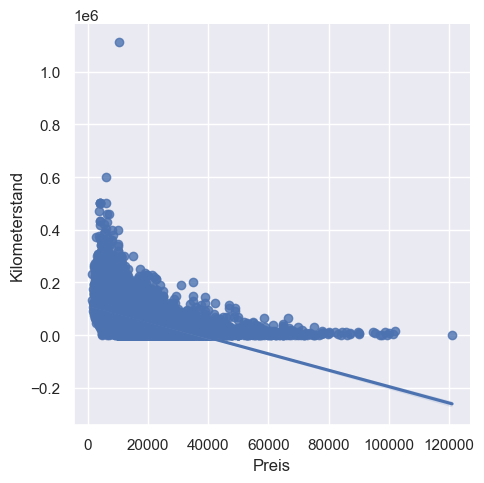

In [253]:
sns.lmplot(data = data_five, x='Preis', y='Kilometerstand')

In [254]:
# Wie teuer war durschschnittzlich ein Auto von Hersteller X
#Volkswagen
#Opel
#Ford
#Skoda
#Renault
data_five['Hersteller'].describe()

count          21772
unique             5
top       Volkswagen
freq            6907
Name: Hersteller, dtype: object

In [255]:
pd.unique(data_five['Hersteller'])

array(['Volkswagen', 'Renault', 'Opel', 'Ford', 'Skoda'], dtype=object)

In [256]:
data_five.head()

Kilometerstand  Hersteller   Modell Kraftstoff Schaltung Zustand  Preis  \
1           92800  Volkswagen     Golf   Gasoline    Manual    Used   6877   
3           96200     Renault   Megane   Gasoline    Manual    Used   6950   
6           91894     Renault   Scenic     Diesel    Manual    Used   6970   
7          127500        Opel   Zafira   Gasoline    Manual    Used   6972   
9             104        Ford  Transit     Diesel    Manual    Used   6990   

   PS  Jahr  
1 122  2011  
3 110  2011  
6 131  2011  
7 116  2011  
9  86  2011

In [257]:
data_five.groupby(['Hersteller']).Preis.mean().sort_values(ascending=False)

Hersteller
Volkswagen   16067
Ford         13781
Skoda        13720
Renault      11336
Opel         10422
Name: Preis, dtype: float64

In [258]:
data_five.groupby(['Hersteller', 'Modell']).Preis.mean().sort_values(ascending=False)

Hersteller  Modell         
Volkswagen  T6.1 California   82555
Renault     Alpine A110       74890
Ford        F 150             69475
Volkswagen  T6 California     67536
Ford        Explorer          66511
                               ... 
Renault     Wind               5091
Ford        Transit Bus        5000
Renault     Modus              4526
Skoda       Praktik            4037
Volkswagen  Fox                2920
Name: Preis, Length: 146, dtype: float64

In [259]:
data_five.groupby(['Hersteller', 'Modell']).Hersteller.count()

Hersteller  Modell     
Ford        B-Max          128
            C-Max          190
            EcoSport       154
            Edge            40
            Explorer         6
                          ... 
Volkswagen  Tiguan         569
            Touareg        104
            Touran         363
            Transporter      3
            up!            943
Name: Hersteller, Length: 146, dtype: int64

## 1.3 
Trainiere ein Modell deiner Wahl, z.b: LinReg, um ausgehend von Features deiner Wahl den Verkaufspreis eines Autos vorherzusagen.


In [260]:
data_five.columns

Index(['Kilometerstand', 'Hersteller', 'Modell', 'Kraftstoff', 'Schaltung',
       'Zustand', 'Preis', 'PS', 'Jahr'],
      dtype='object')

In [318]:
y = data_five['Preis']
X = data_five[['Kilometerstand', 'PS', 'Jahr', 'Hersteller']]

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [321]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [322]:
print(f"Koeffizienten: {model.coef_}")

Koeffizienten: [-3.90953330e-02  1.27357620e+02  1.15338777e+03 -6.55020707e+02]


In [323]:
predictions = model.predict(X_test)

In [324]:
predictions

array([31683.5387742 ,  6485.05956572, 16380.5665384 , ...,
        8396.18154424,  4642.75429862,  7792.67264636])

Text(0, 0.5, 'Predictions')

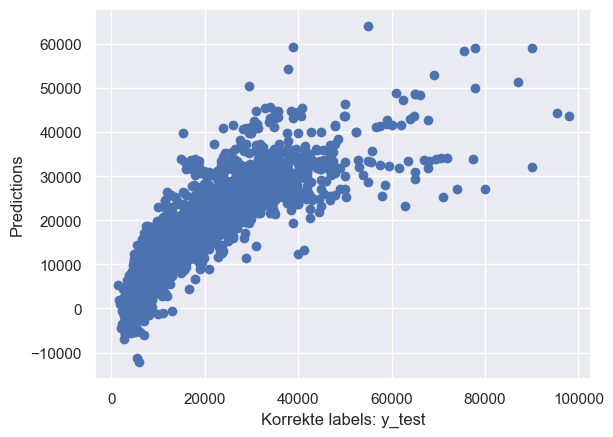

In [325]:
plt.scatter(y_test, predictions)
plt.xlabel("Korrekte labels: y_test")
plt.ylabel("Predictions")

## Welche kategorie von Machine Learning ist dieses Problem?

## Wie wird die Güte des Modells evaluiert? Was ist die Fehlermetrik?

In [326]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3028.949445509945
MSE 21790303.27766847
RSE 4668.00849160201


C:\Users\Eric\AppData\Local\Temp\ipykernel_1324\202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<Axes: xlabel='Preis', ylabel='Density'>

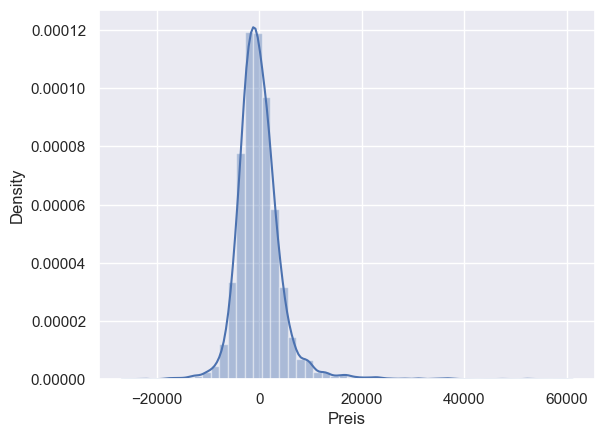

In [269]:
sns.distplot((y_test - predictions))

## Empfehlung

In [327]:
koeffizient = pd.DataFrame(model.coef_, X.columns)
koeffizient.columns = ['Umsatz']
koeffizient

Umsatz
Kilometerstand      -0
PS                 127
Jahr              1153
Hersteller        -655

## Hersteller, Modelle, etc. in Zahlen umwandeln um diese in das Modell mid einzubinden und zu trainieren

Indexe für die top 5 Marken des Datensatzes um den herstelleer in das Preis modell einzurechnen. (potenziell das gleiche für Kraftstoff, Schaltung und Zustand)

In [314]:
indexing = {
   'Volkswagen': 1,
    'Opel': 2,
    'Ford': 3,
    'Skoda': 4,
    'Renault': 5
}

# data_five.loc[: 'Hersteller'] = data_five['Hersteller'].replace(indexing)

data_five_copy = data_five.copy()
data_five_copy['Hersteller'] = data_five_copy['Hersteller'].replace(indexing)
data_five = data_five_copy

In [315]:
data_five.head()

Kilometerstand  Hersteller   Modell Kraftstoff Schaltung Zustand  Preis  \
1           92800           1     Golf   Gasoline    Manual    Used   6877   
3           96200           5   Megane   Gasoline    Manual    Used   6950   
6           91894           5   Scenic     Diesel    Manual    Used   6970   
7          127500           2   Zafira   Gasoline    Manual    Used   6972   
9             104           3  Transit     Diesel    Manual    Used   6990   

   PS  Jahr  
1 122  2011  
3 110  2011  
6 131  2011  
7 116  2011  
9  86  2011

In [316]:
data_five['Kraftstoff'].sort_values(ascending=False).unique()

array(['Others', 'LPG', 'Gasoline', 'Ethanol', 'Electric/Gasoline',
       'Electric/Diesel', 'Electric', 'Diesel', 'CNG', '-/- (Fuel)'],
      dtype=object)

In [291]:
data_five['Schaltung'].sort_values(ascending=False).unique()

array(['Semi-automatic', 'Manual', 'Automatic'], dtype=object)

In [292]:
data_five['Zustand'].sort_values(ascending=False).unique()

array(['Used', 'Pre-registered', 'New', "Employee's car", 'Demonstration'],
      dtype=object)

In [317]:
data_five.groupby(['Hersteller', 'Modell']).Modell.count().sort_values(ascending=False)

Hersteller  Modell     
1           Golf           1489
2           Corsa          1485
3           Fiesta         1273
2           Astra          1190
3           Focus           985
                           ... 
1           Golf GTE          1
            T4 Allstar        1
3           Flex              1
            Transit Bus       1
5           Alaskan           1
Name: Modell, Length: 146, dtype: int64

### `Boxplot`

Mit <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">`boxplot`</a> kann man ein Boxplot der Daten erstellen. Boxplots sind eine wichtige Visualisierung der Verteilung in der Statistik, besonders für kategorische Variablen. 

Unten findest du eine gute Übersicht von den Metriken um ein Boxplot interpretieren zu können:

![boxplotimage.jpg](attachment:boxplotimage.jpg)

In [34]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

<Axes: xlabel='Hersteller', ylabel='count'>

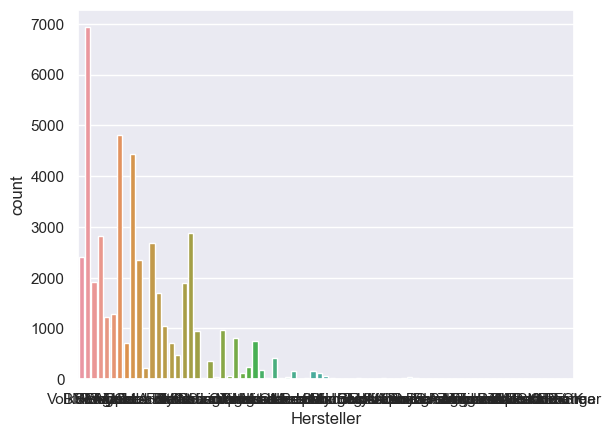

In [137]:
sns.countplot(data = data, x='Hersteller')

In [138]:
sns.barplot(data = data, x='Hersteller', y='Preis')

<Axes: xlabel='Hersteller', ylabel='Preis'>

<Axes: xlabel='Hersteller', ylabel='Preis'>

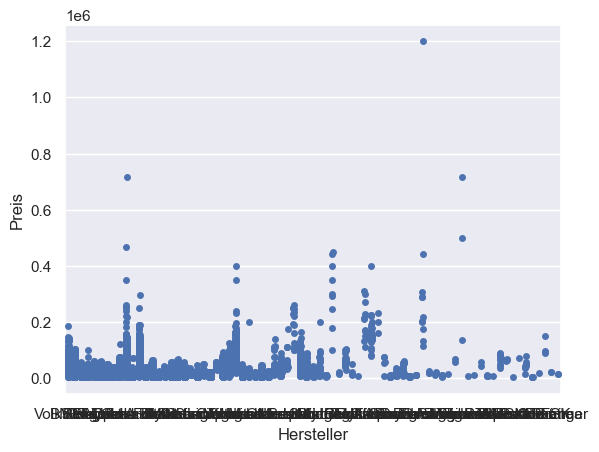

In [139]:
sns.stripplot(data = data, x='Hersteller', y='Preis')

<Axes: xlabel='Preis', ylabel='Hersteller'>

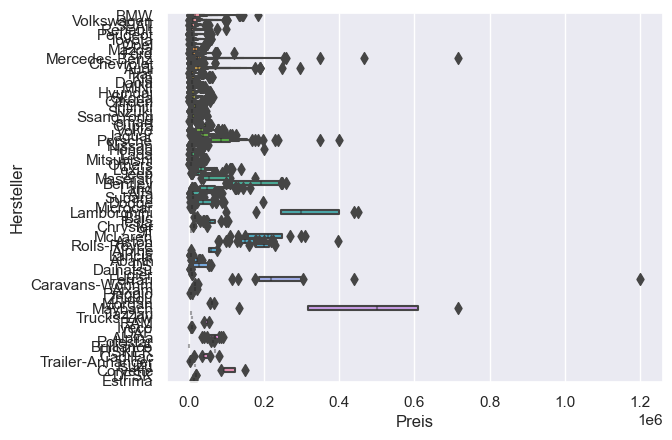

In [140]:
sns.boxenplot(data = data, x='Preis', y='Hersteller')

<Axes: xlabel='Jahr', ylabel='Count'>

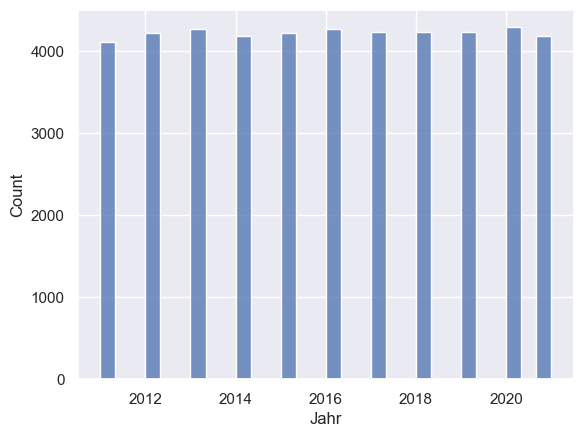

In [141]:
sns.histplot(data = data, x='Jahr')

<Axes: xlabel='Preis', ylabel='Hersteller'>

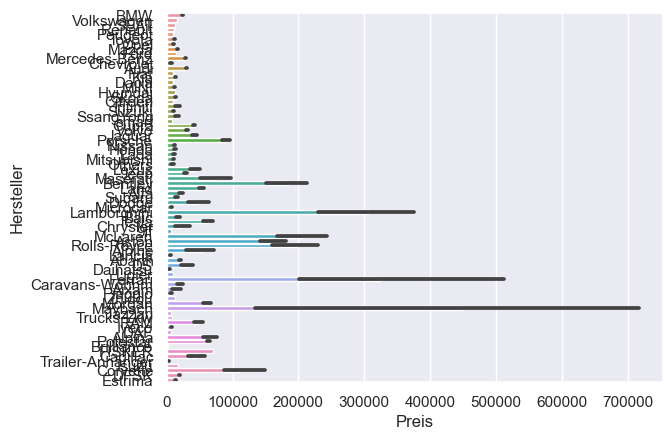

In [22]:
sns.barplot(data = data, x='Preis', y='Hersteller')

<Axes: xlabel='Preis', ylabel='Hersteller'>

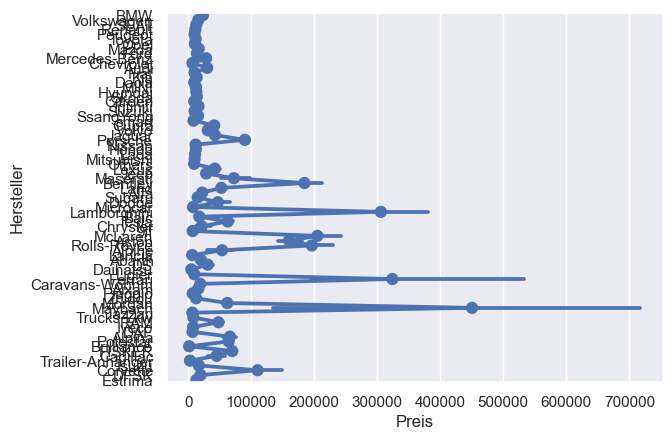

In [142]:
sns.pointplot(data = data, x='Preis', y='Hersteller')

In [143]:
data.head(10)

Kilometerstand  Hersteller   Modell         Kraftstoff  Schaltung Zustand  \
0       235000.00         BMW      316             Diesel     Manual    Used   
1        92800.00  Volkswagen     Golf           Gasoline     Manual    Used   
2       149300.00        SEAT     Exeo           Gasoline     Manual    Used   
3        96200.00     Renault   Megane           Gasoline     Manual    Used   
4       156000.00     Peugeot      308           Gasoline     Manual    Used   
5       147000.00      Toyota    Auris  Electric/Gasoline  Automatic    Used   
6        91894.00     Renault   Scenic             Diesel     Manual    Used   
7       127500.00        Opel   Zafira           Gasoline     Manual    Used   
8       115000.00       Mazda        3           Gasoline  Automatic    Used   
9          104.00        Ford  Transit             Diesel     Manual    Used   

    Preis     PS    Jahr  
0 6800.00 116.00 2011.00  
1 6877.00 122.00 2011.00  
2 6900.00 160.00 2011.00  
3 6950.00 110.00 2011.00  
4 6950.00 156.00 2011.00  
5 6950.00  99.00 2011.00  
6 6970.00 131.00 2011.00  
7 6972.00 116.00 2011.00  
8 6980.00 150.00 2011.00  
9 6990.00  86.00 2011.00

<Axes: xlabel='Kilometerstand', ylabel='Hersteller'>

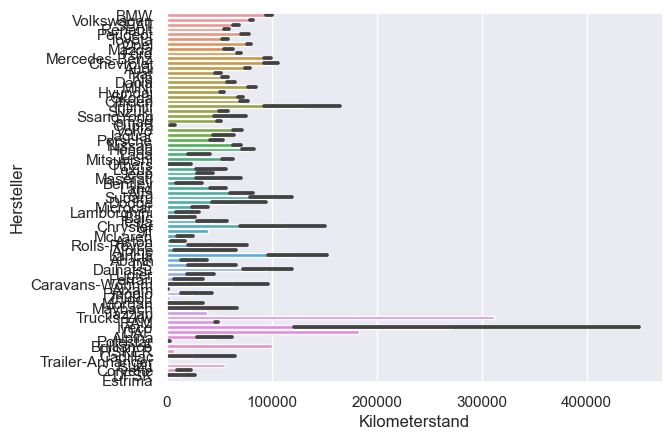

In [144]:
sns.barplot(data = data, x='Kilometerstand', y='Hersteller')

<Axes: xlabel='Kilometerstand', ylabel='Modell'>

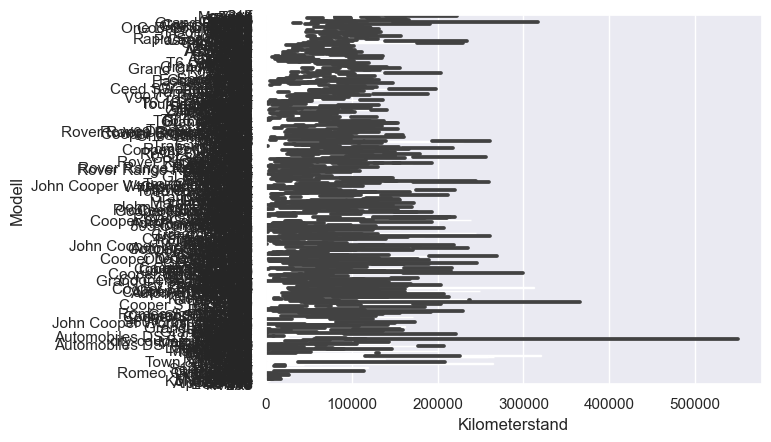

In [27]:
sns.barplot(data = data, x='Kilometerstand', y='Modell')

In [145]:
sns.barplot(data = data, x='Kilometerstand', y='Kraftstoff')

<Axes: xlabel='Kilometerstand', ylabel='Kraftstoff'>

<Axes: xlabel='Kilometerstand', ylabel='Schaltung'>

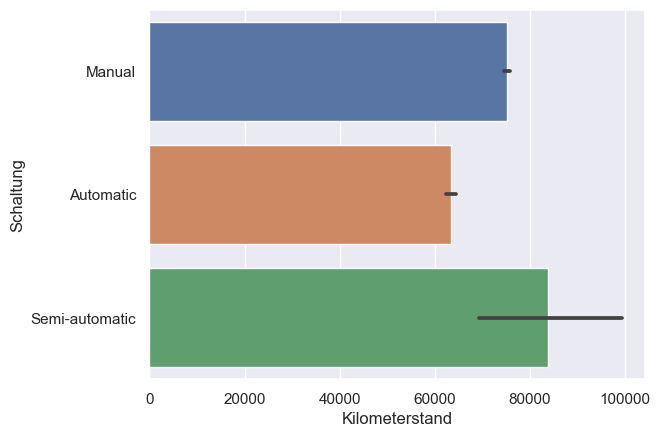

In [29]:
sns.barplot(data = data, x='Kilometerstand', y='Schaltung')

<Axes: xlabel='Kilometerstand', ylabel='Zustand'>

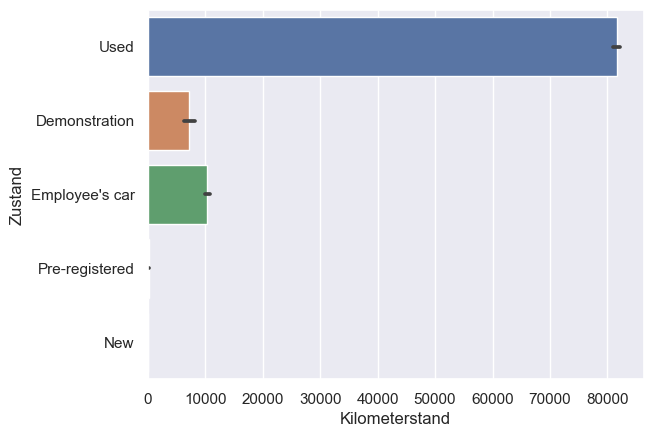

In [30]:

sns.barplot(data = data, x='Kilometerstand', y='Zustand')


<Axes: xlabel='Kilometerstand', ylabel='Hersteller'>

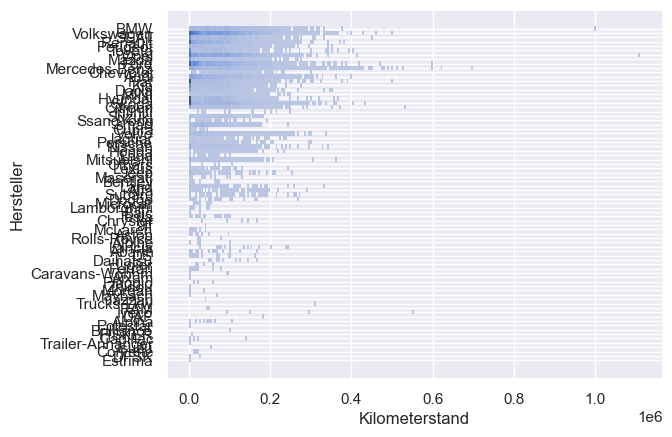

In [31]:

sns.histplot(data = data, x='Kilometerstand', y='Hersteller')


<Axes: xlabel='Kilometerstand', ylabel='Modell'>

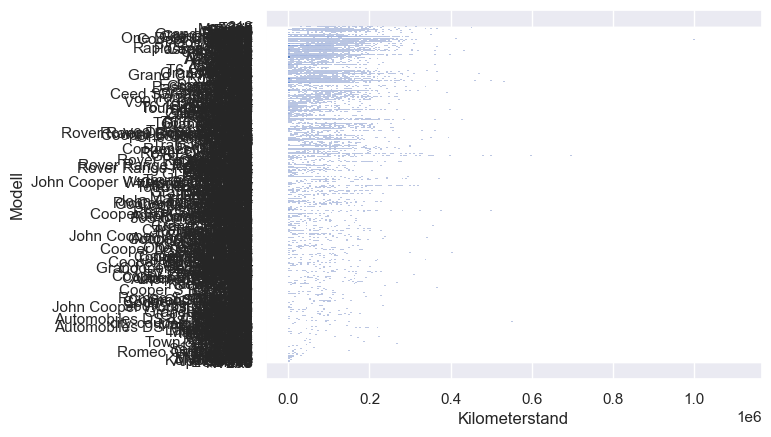

In [32]:

sns.histplot(data = data, x='Kilometerstand', y='Modell')


<Axes: xlabel='Kilometerstand', ylabel='Kraftstoff'>

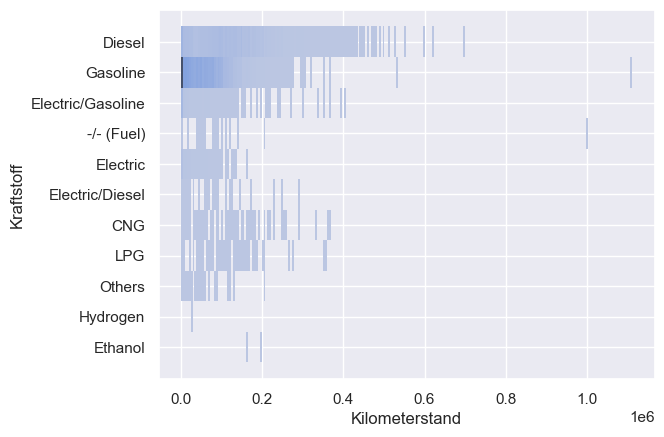

In [146]:

sns.histplot(data = data, x='Kilometerstand', y='Kraftstoff')

<Axes: xlabel='Kilometerstand', ylabel='Schaltung'>

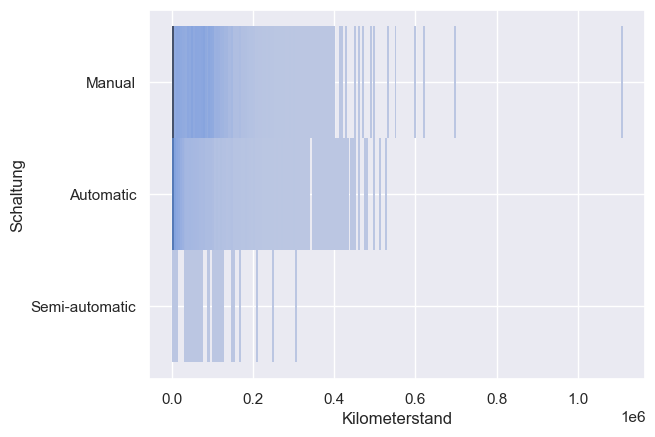

In [35]:
sns.histplot(data = data, x='Kilometerstand', y='Schaltung')


<Axes: xlabel='Kilometerstand', ylabel='Zustand'>

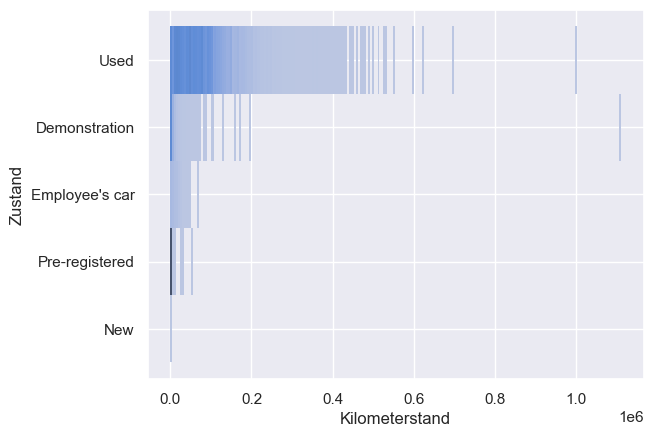

In [37]:

sns.histplot(data = data, x='Kilometerstand', y='Zustand')


<Axes: xlabel='count', ylabel='Hersteller'>

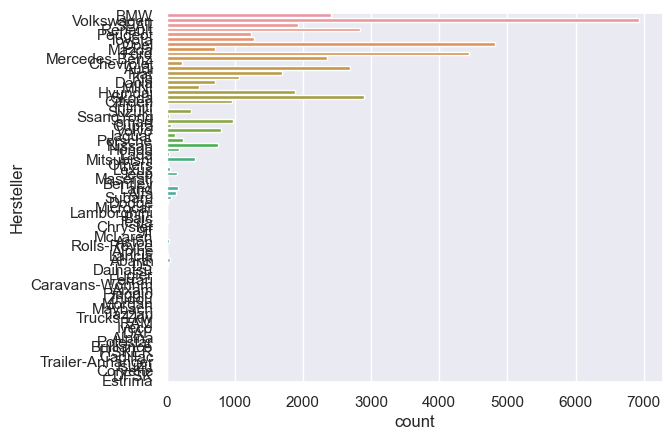

In [147]:

sns.countplot(data = data, y='Hersteller')

<Axes: xlabel='count', ylabel='Zustand'>

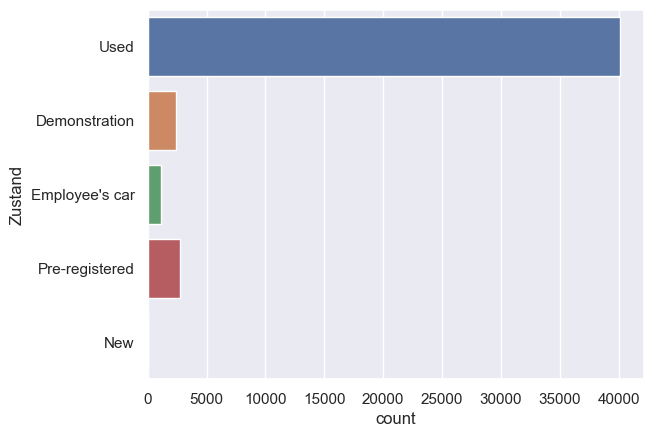

In [148]:
sns.countplot(data = data, y='Zustand')

<Axes: xlabel='count', ylabel='Kraftstoff'>

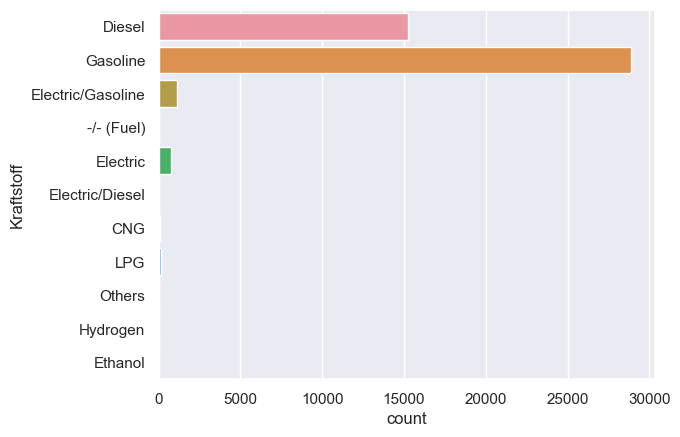

In [149]:
sns.countplot(data = data, y='Kraftstoff')

<Axes: xlabel='count', ylabel='Schaltung'>

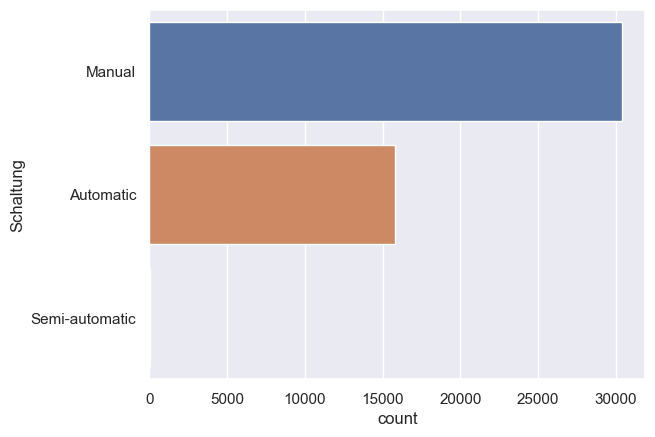

In [150]:
sns.countplot(data = data, y='Schaltung')

<Axes: xlabel='Kilometerstand', ylabel='Hersteller'>

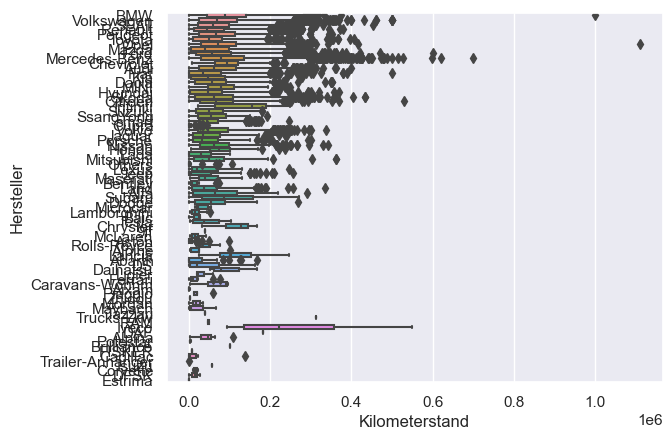

In [151]:
sns.boxplot(data = data, x='Kilometerstand', y='Hersteller')

<Axes: xlabel='Kilometerstand', ylabel='Modell'>

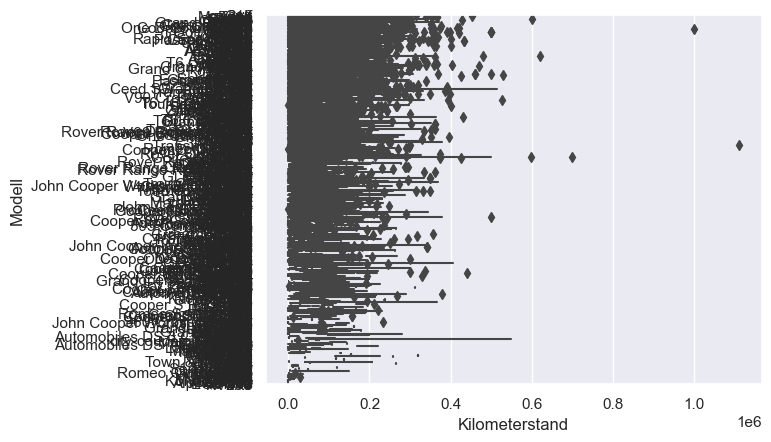

In [152]:
sns.boxplot(data = data, x='Kilometerstand', y='Modell')

<Axes: xlabel='Kilometerstand', ylabel='Zustand'>

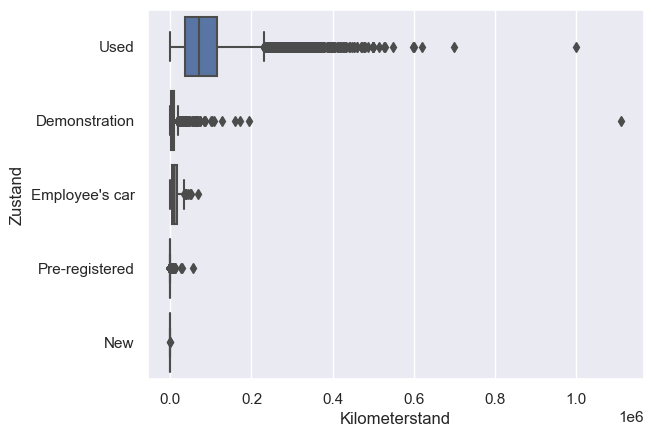

In [153]:
sns.boxplot(data = data, x='Kilometerstand', y='Zustand')

<Axes: xlabel='Kilometerstand', ylabel='Schaltung'>

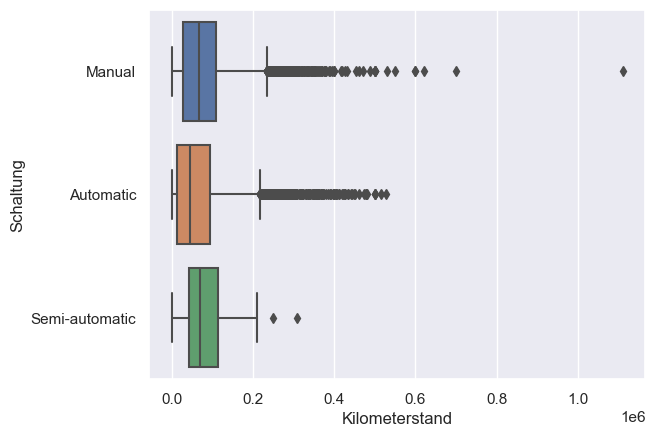

In [154]:
sns.boxplot(data = data, x='Kilometerstand', y='Schaltung')

In [155]:
sns.boxplot(data = data, x='Kilometerstand', y='Kraftstoff')

<Axes: xlabel='Kilometerstand', ylabel='Kraftstoff'>

<Axes: xlabel='Preis', ylabel='Hersteller'>

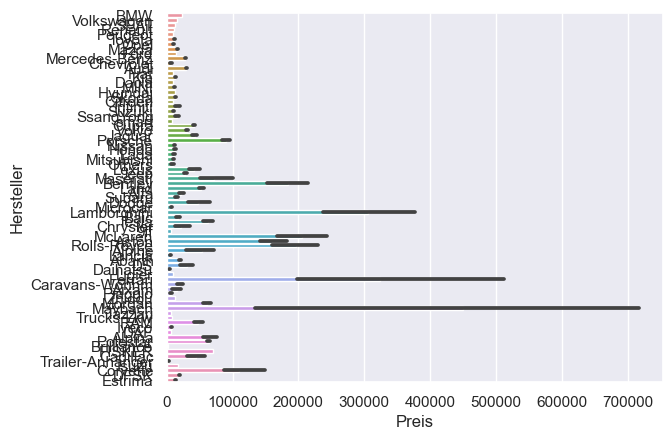

In [156]:
sns.barplot(data = data, x='Preis', y='Hersteller')

<Axes: xlabel='Preis', ylabel='Kraftstoff'>

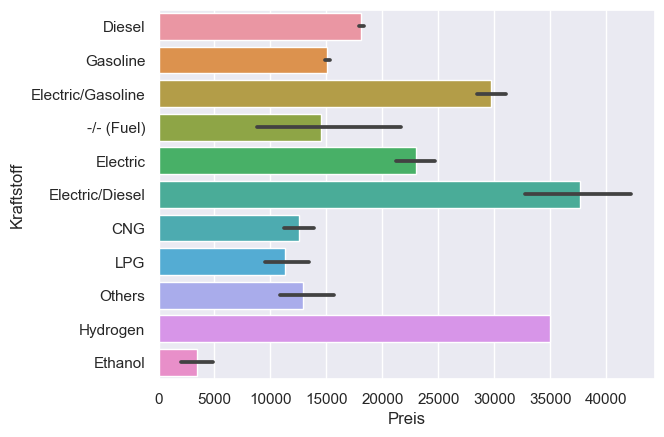

In [157]:
sns.barplot(data = data, x='Preis', y='Kraftstoff')

<Axes: xlabel='Preis', ylabel='Modell'>

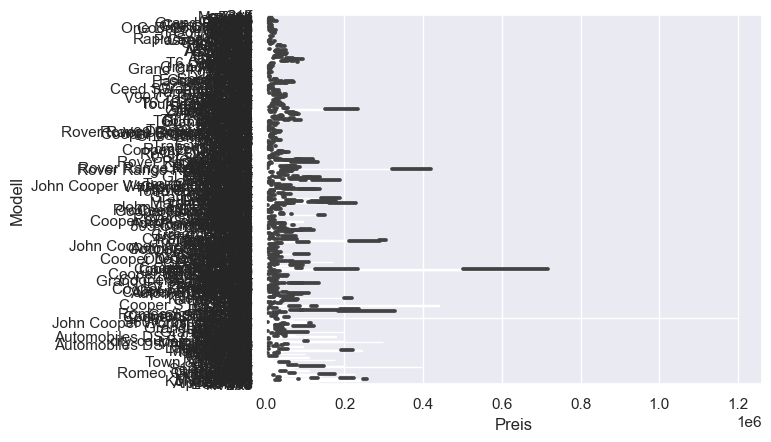

In [158]:
sns.barplot(data = data, x='Preis', y='Modell')

In [159]:
sns.barplot(data = data, x='Preis', y='Schaltung')

<Axes: xlabel='Preis', ylabel='Schaltung'>

<Axes: xlabel='Preis', ylabel='Zustand'>

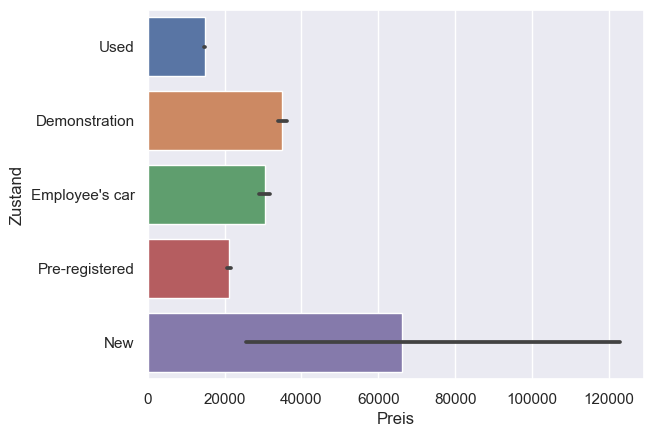

In [160]:
sns.barplot(data = data, x='Preis', y='Zustand')

<Axes: xlabel='Preis', ylabel='Hersteller'>

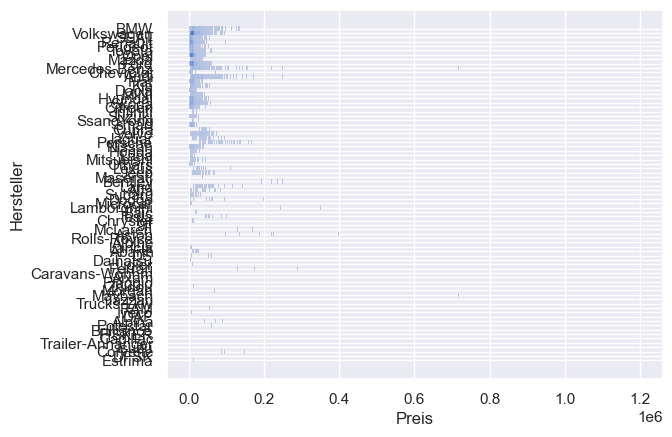

In [161]:
sns.histplot(data = data, x='Preis', y='Hersteller')

<Axes: xlabel='Preis', ylabel='Modell'>

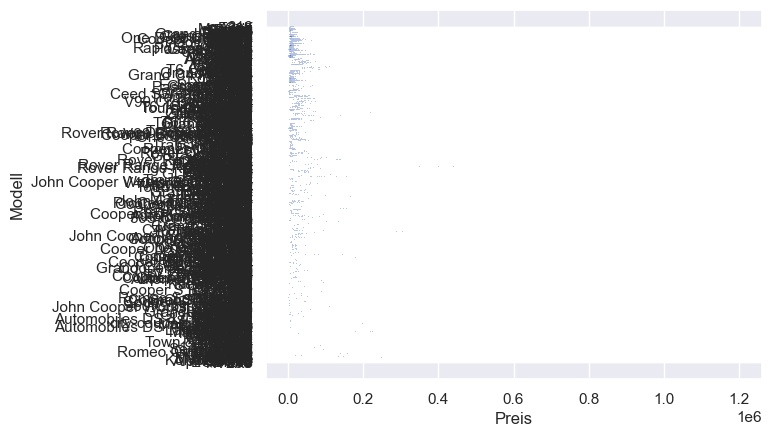

In [162]:
sns.histplot(data = data, x='Preis', y='Modell')

<Axes: xlabel='Preis', ylabel='Kraftstoff'>

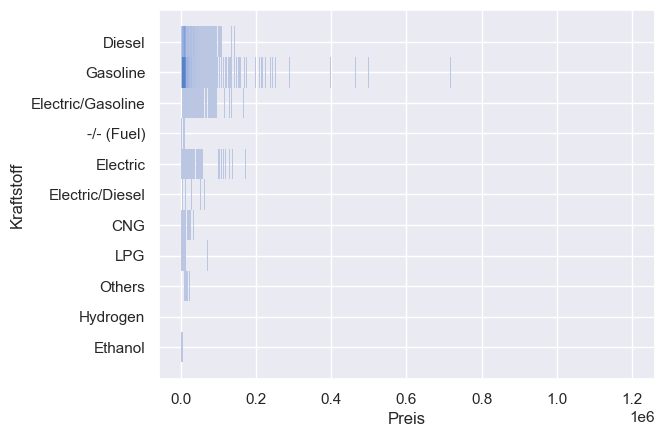

In [163]:
sns.histplot(data = data, x='Preis', y='Kraftstoff')

<Axes: xlabel='Preis', ylabel='Schaltung'>

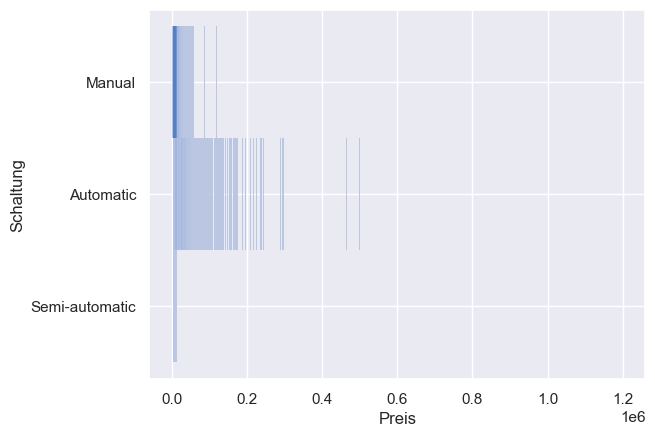

In [164]:
sns.histplot(data = data, x='Preis', y='Schaltung')

In [165]:
sns.histplot(data = data, x='Preis', y='Zustand')

<Axes: xlabel='Preis', ylabel='Zustand'>

<Axes: xlabel='Preis', ylabel='Hersteller'>

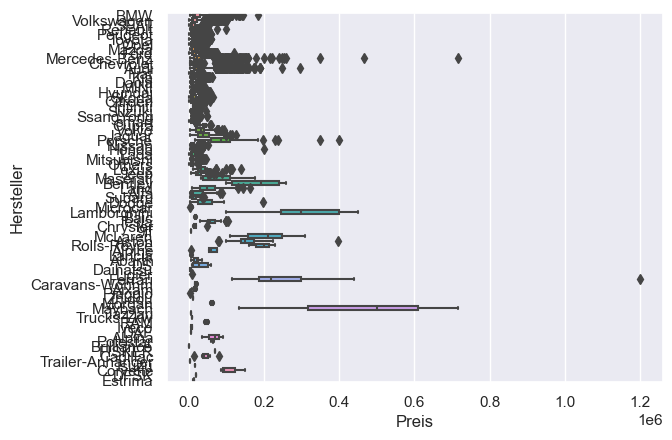

In [166]:
sns.boxplot(data = data, x='Preis', y='Hersteller')

In [167]:
sns.boxplot(data = data, x='Preis', y='Modell')

<Axes: xlabel='Preis', ylabel='Modell'>

<Axes: xlabel='Preis', ylabel='Zustand'>

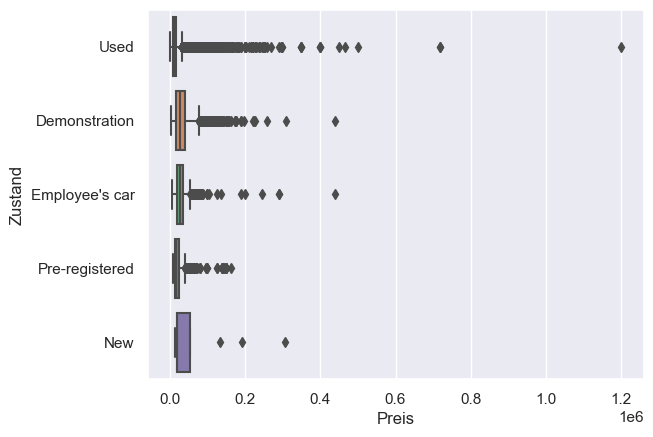

In [168]:
sns.boxplot(data = data, x='Preis', y='Zustand')

<Axes: xlabel='Preis', ylabel='Schaltung'>

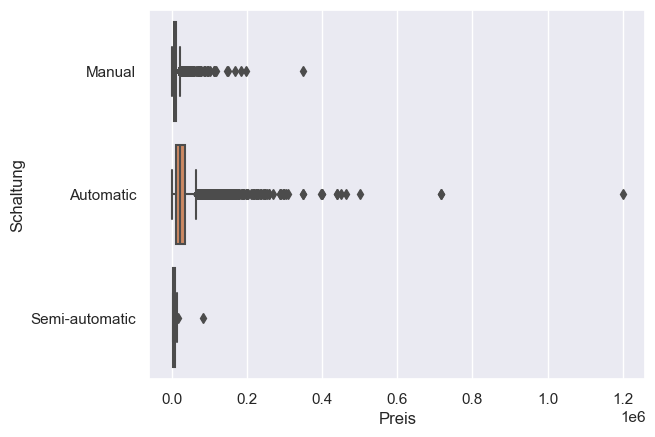

In [169]:
sns.boxplot(data = data, x='Preis', y='Schaltung')

<Axes: xlabel='Preis', ylabel='Kraftstoff'>

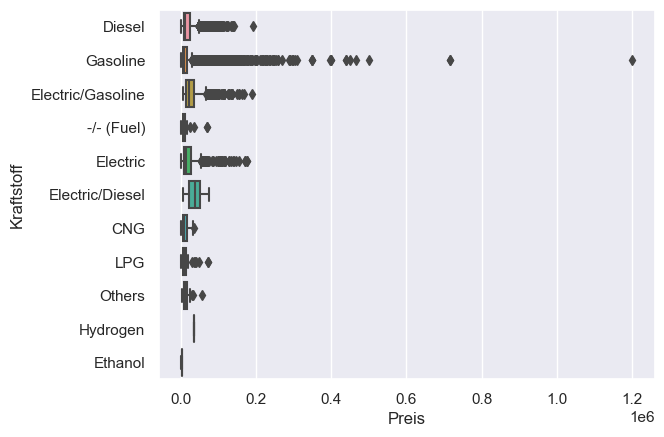

In [170]:
sns.boxplot(data = data, x='Preis', y='Kraftstoff')

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='PS', ylabel='Hersteller'>

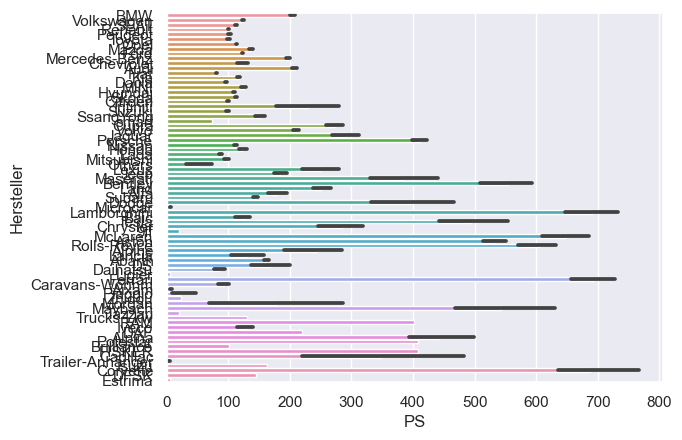

In [171]:
sns.barplot(data = data, x='PS', y='Hersteller')

<Axes: xlabel='PS', ylabel='Modell'>

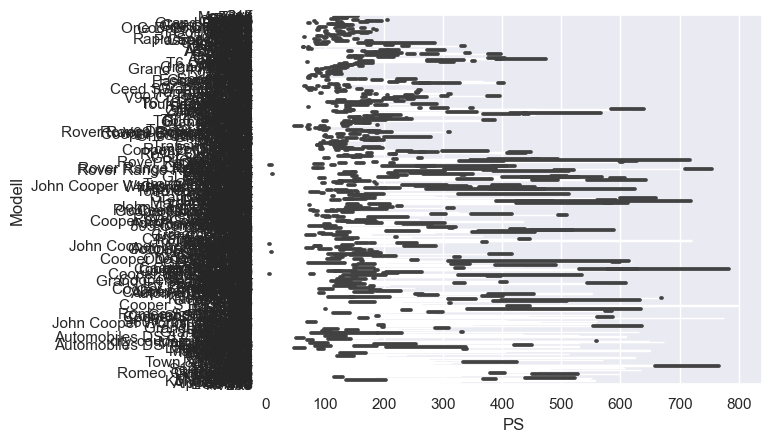

In [172]:
sns.barplot(data = data, x='PS', y='Modell')

<Axes: xlabel='PS', ylabel='Kraftstoff'>

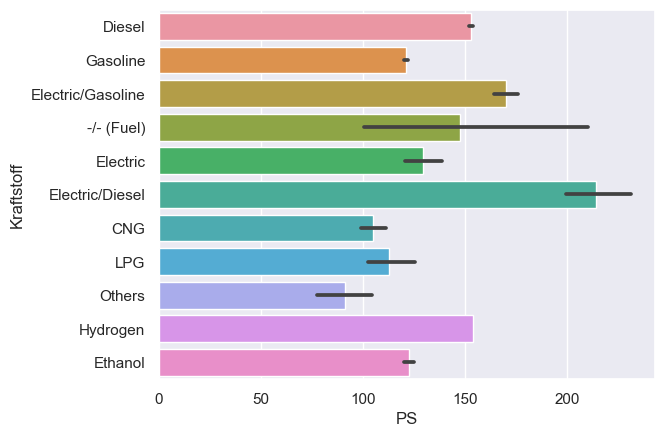

In [173]:
sns.barplot(data = data, x='PS', y='Kraftstoff')

<Axes: xlabel='PS', ylabel='Schaltung'>

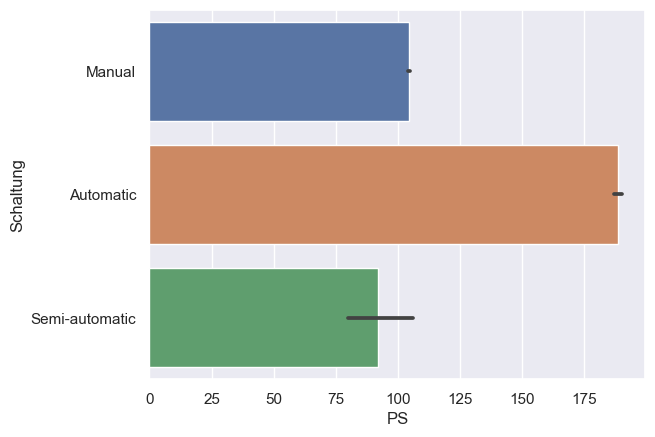

In [174]:
sns.barplot(data = data, x='PS', y='Schaltung')

<Axes: xlabel='PS', ylabel='Zustand'>

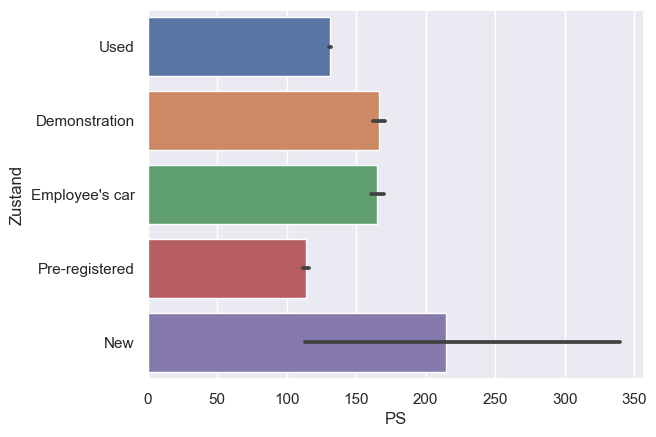

In [175]:
sns.barplot(data = data, x='PS', y='Zustand')

<Axes: xlabel='PS', ylabel='Hersteller'>

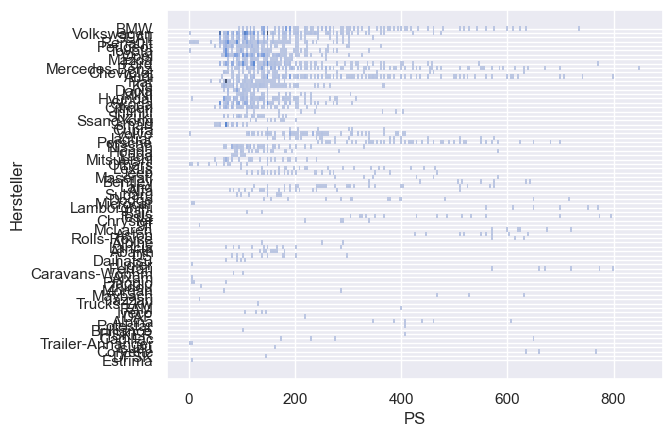

In [176]:
sns.histplot(data = data, x='PS', y='Hersteller')

<Axes: xlabel='PS', ylabel='Modell'>

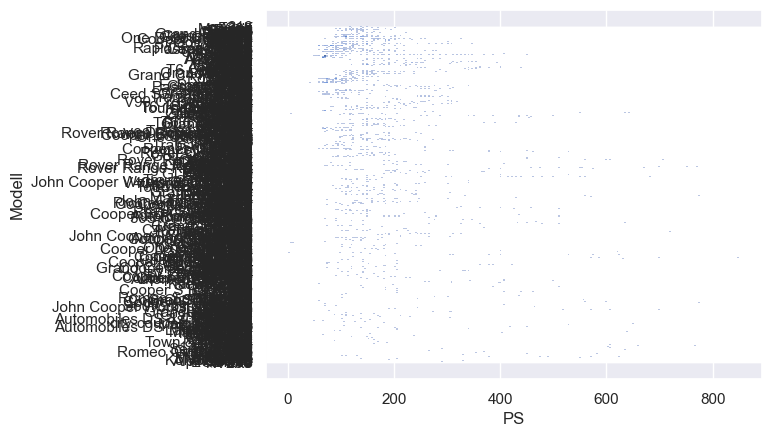

In [177]:
sns.histplot(data = data, x='PS', y='Modell')

<Axes: xlabel='PS', ylabel='Kraftstoff'>

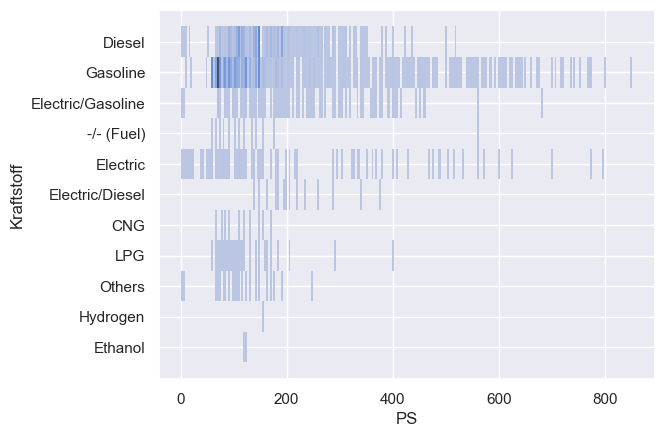

In [178]:
sns.histplot(data = data, x='PS', y='Kraftstoff')

<Axes: xlabel='PS', ylabel='Schaltung'>

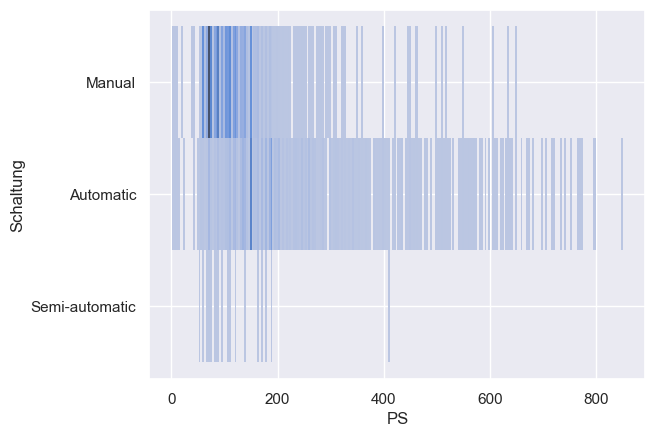

In [179]:
sns.histplot(data = data, x='PS', y='Schaltung')

<Axes: xlabel='PS', ylabel='Zustand'>

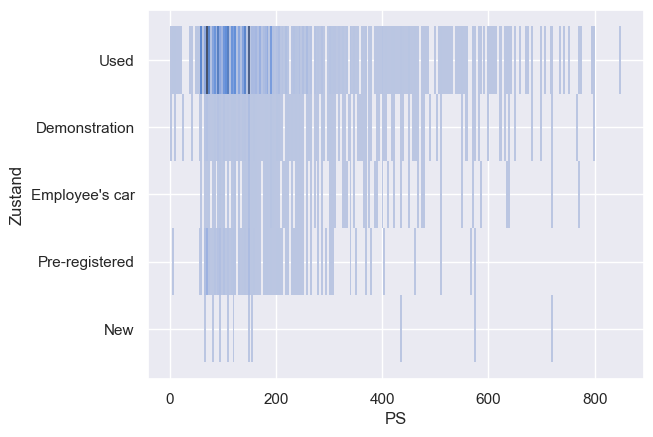

In [180]:
sns.histplot(data = data, x='PS', y='Zustand')

<Axes: xlabel='PS', ylabel='Hersteller'>

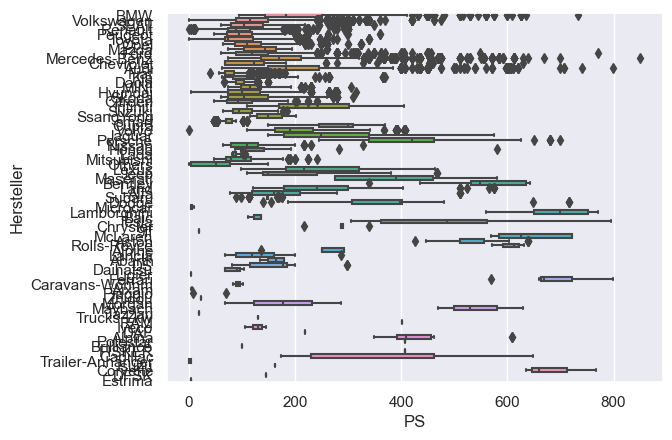

In [181]:
sns.boxplot(data = data, x='PS', y='Hersteller')

<Axes: xlabel='PS', ylabel='Zustand'>

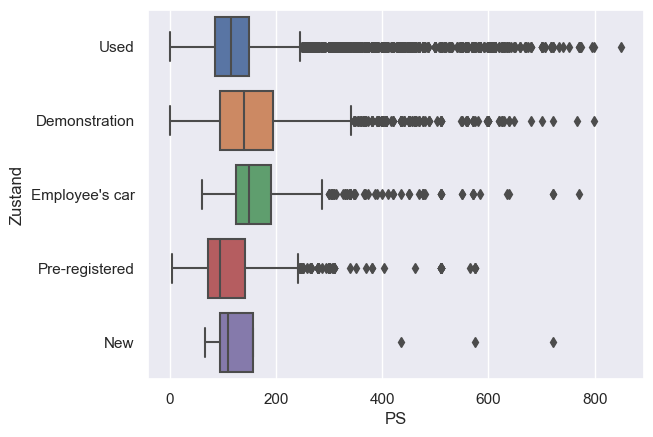

In [182]:
sns.boxplot(data = data, x='PS', y='Zustand')

<Axes: xlabel='PS', ylabel='Modell'>

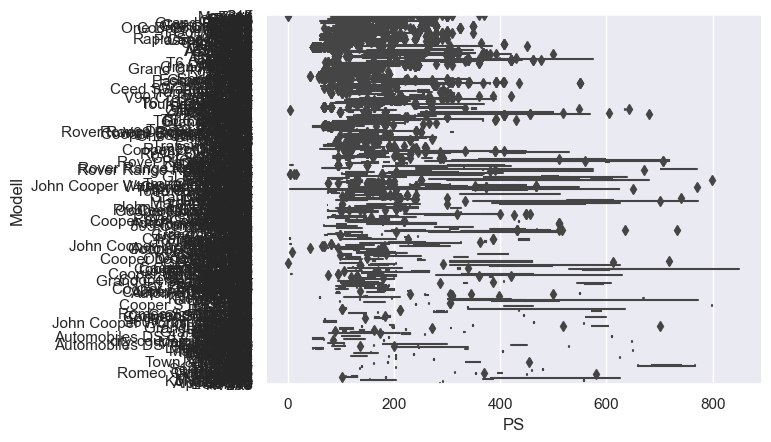

In [183]:
sns.boxplot(data = data, x='PS', y='Modell')

<Axes: xlabel='PS', ylabel='Schaltung'>

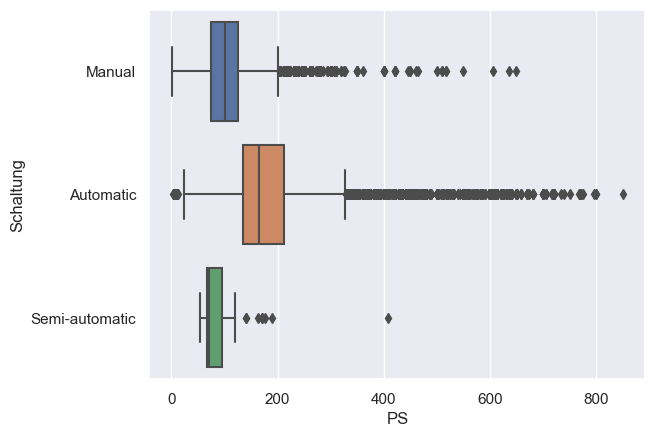

In [184]:
sns.boxplot(data = data, x='PS', y='Schaltung')

<Axes: xlabel='PS', ylabel='Kraftstoff'>

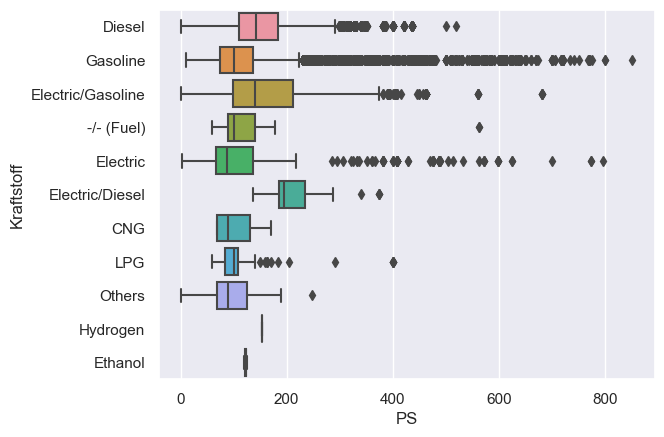

In [185]:
sns.boxplot(data = data, x='PS', y='Kraftstoff')

<Axes: xlabel='Jahr', ylabel='Hersteller'>

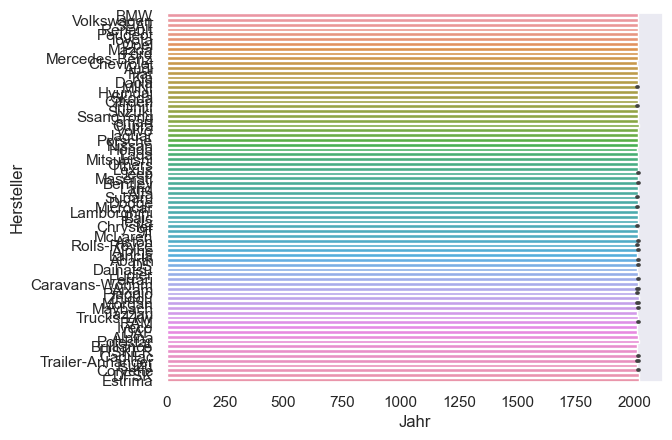

In [186]:
sns.barplot(data = data, x='Jahr', y='Hersteller')

<Axes: xlabel='Jahr', ylabel='Modell'>

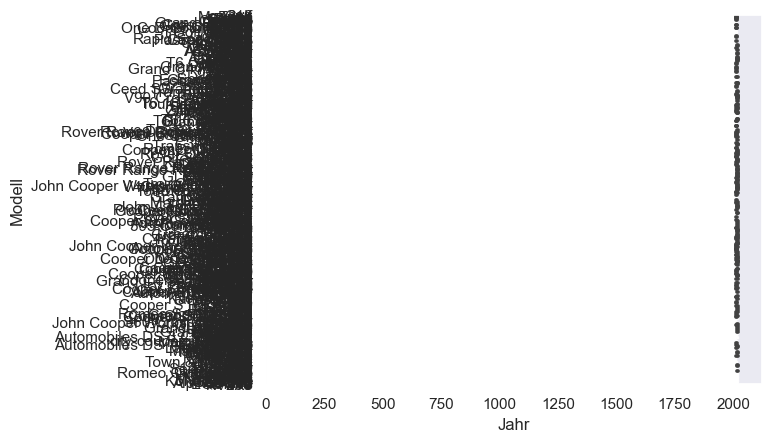

In [187]:
sns.barplot(data = data, x='Jahr', y='Modell')

<Axes: xlabel='Jahr', ylabel='Kraftstoff'>

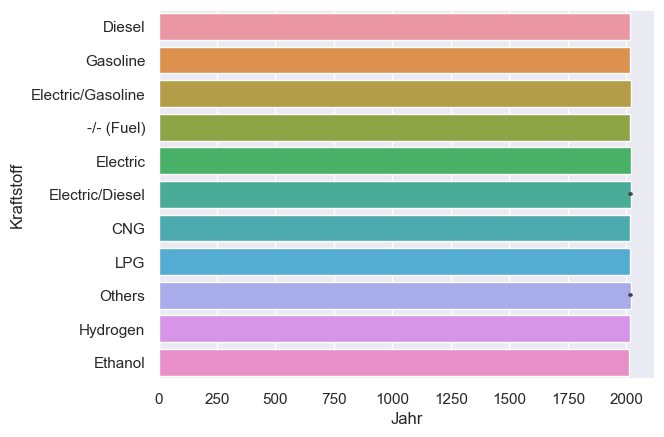

In [188]:
sns.barplot(data = data, x='Jahr', y='Kraftstoff')

<Axes: xlabel='Jahr', ylabel='Schaltung'>

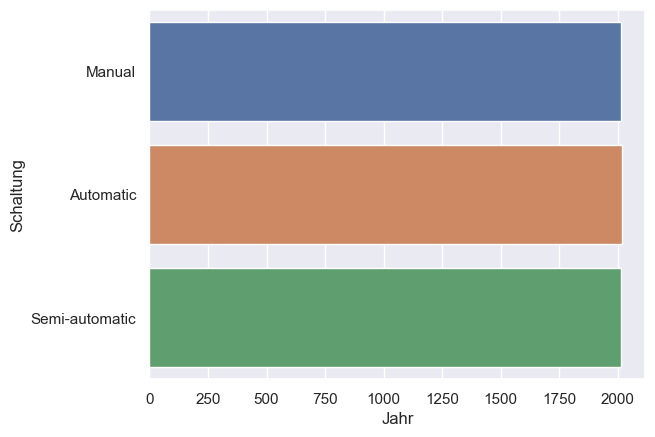

In [189]:
sns.barplot(data = data, x='Jahr', y='Schaltung')

<Axes: xlabel='Jahr', ylabel='Zustand'>

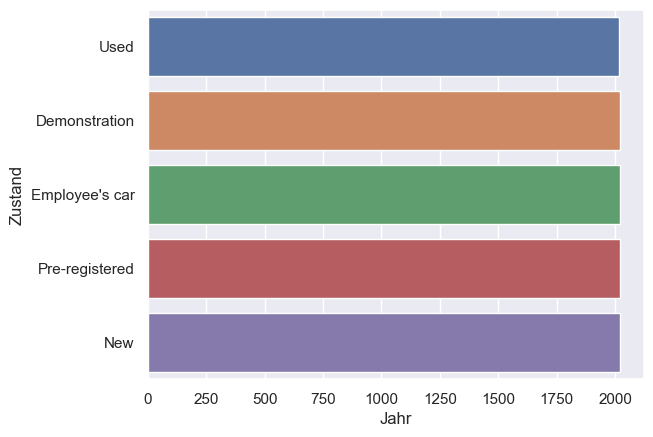

In [190]:
sns.barplot(data = data, x='Jahr', y='Zustand')

<Axes: xlabel='Jahr', ylabel='Hersteller'>

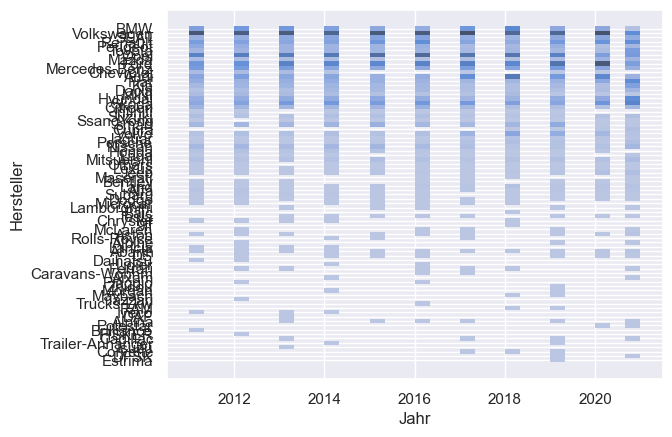

In [191]:
sns.histplot(data = data, x='Jahr', y='Hersteller')

<Axes: xlabel='Jahr', ylabel='Modell'>

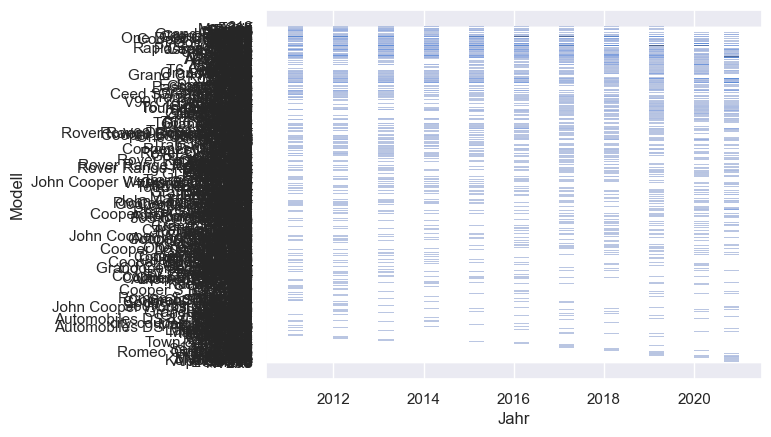

In [192]:
sns.histplot(data = data, x='Jahr', y='Modell')

<Axes: xlabel='Jahr', ylabel='Kraftstoff'>

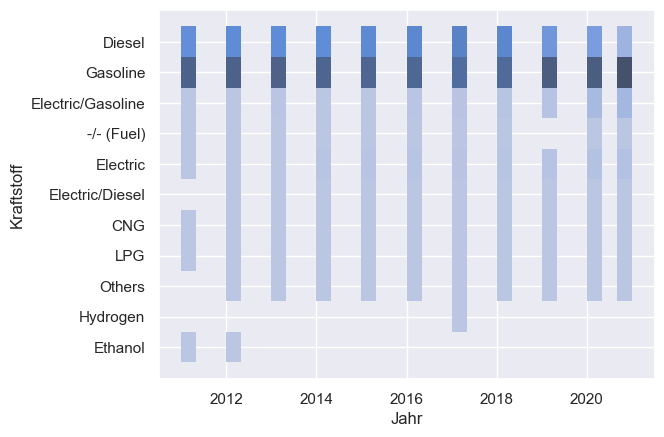

In [193]:
sns.histplot(data = data, x='Jahr', y='Kraftstoff')

<Axes: xlabel='Jahr', ylabel='Schaltung'>

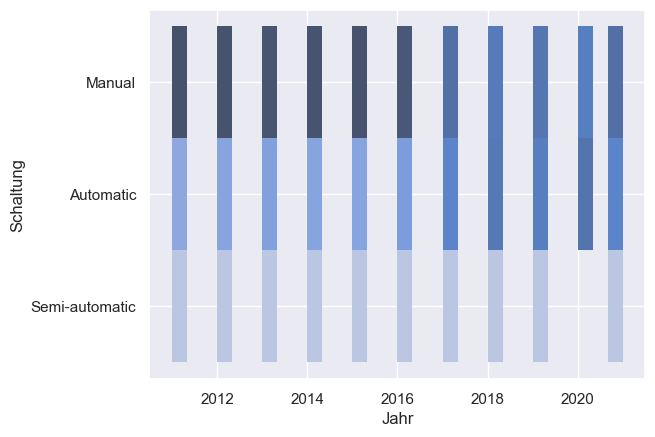

In [194]:
sns.histplot(data = data, x='Jahr', y='Schaltung')

<Axes: xlabel='Jahr', ylabel='Zustand'>

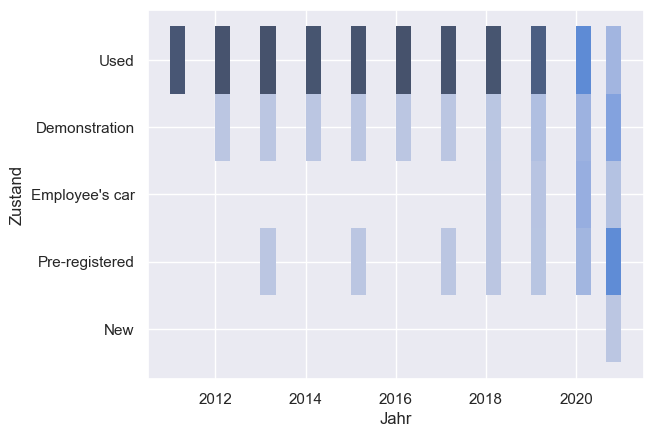

In [195]:
sns.histplot(data = data, x='Jahr', y='Zustand')

<Axes: xlabel='Jahr', ylabel='Hersteller'>

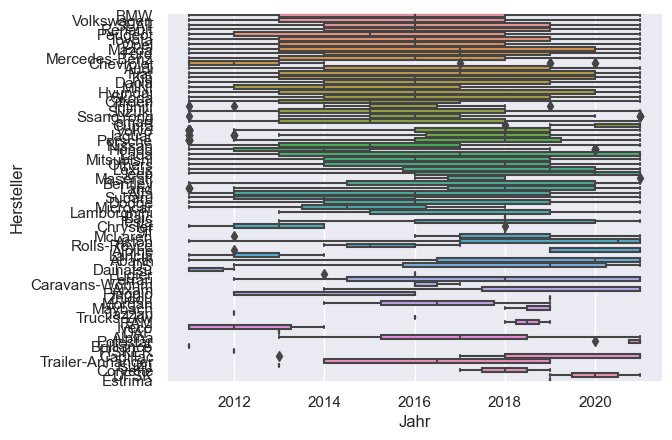

In [196]:
sns.boxplot(data = data, x='Jahr', y='Hersteller')

<Axes: xlabel='Jahr', ylabel='Modell'>

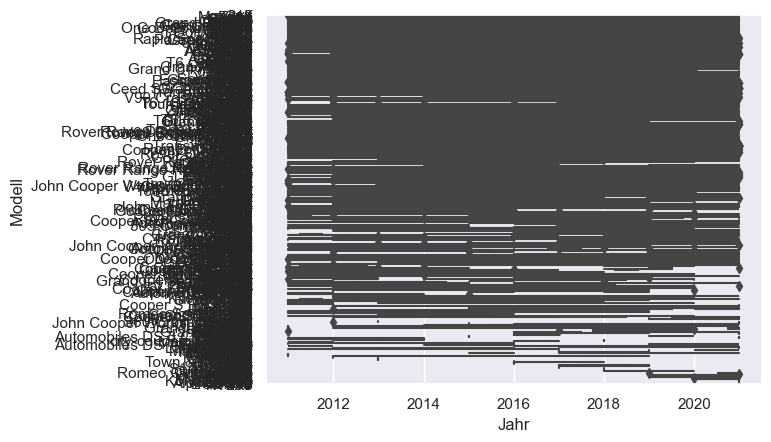

In [197]:
sns.boxplot(data = data, x='Jahr', y='Modell')

<Axes: xlabel='Jahr', ylabel='Zustand'>

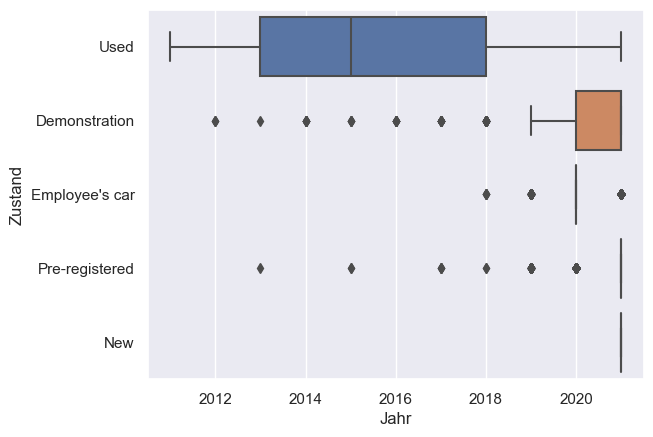

In [198]:
sns.boxplot(data = data, x='Jahr', y='Zustand')

<Axes: xlabel='Jahr', ylabel='Schaltung'>

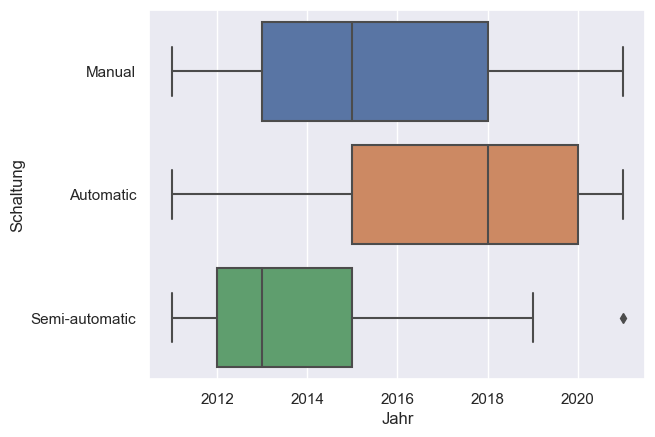

In [199]:
sns.boxplot(data = data, x='Jahr', y='Schaltung')

<Axes: xlabel='Jahr', ylabel='Kraftstoff'>

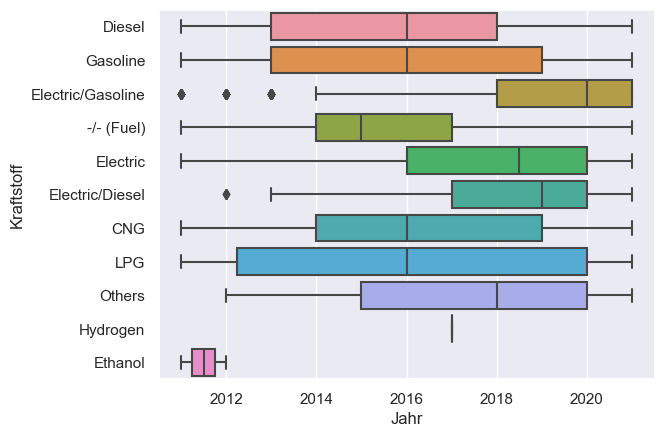

In [200]:
sns.boxplot(data = data, x='Jahr', y='Kraftstoff')

In [254]:
data_num = data.drop(columns=['Hersteller', 'Modell', 'Kraftstoff', 'Schaltung', 'Zustand'])
data_num.head(10)

Kilometerstand  Preis  PS  Jahr
0          235000   6800 116  2011
1           92800   6877 122  2011
2          149300   6900 160  2011
3           96200   6950 110  2011
4          156000   6950 156  2011
5          147000   6950  99  2011
6           91894   6970 131  2011
7          127500   6972 116  2011
8          115000   6980 150  2011
9             104   6990  86  2011

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


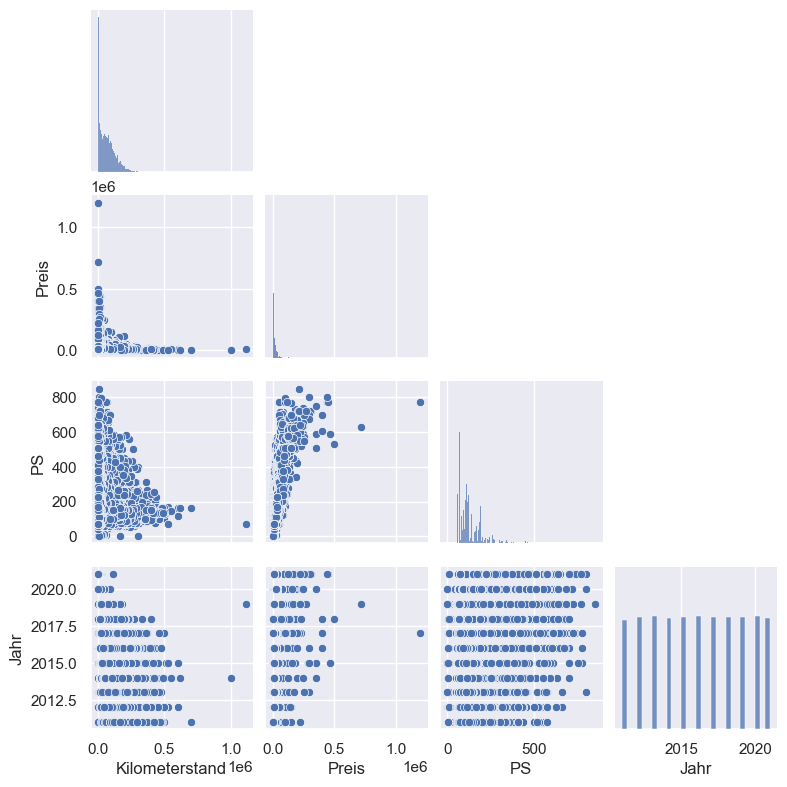

In [255]:
sns.pairplot(data=data_num, diag_kind='hist', height=2, corner=True)

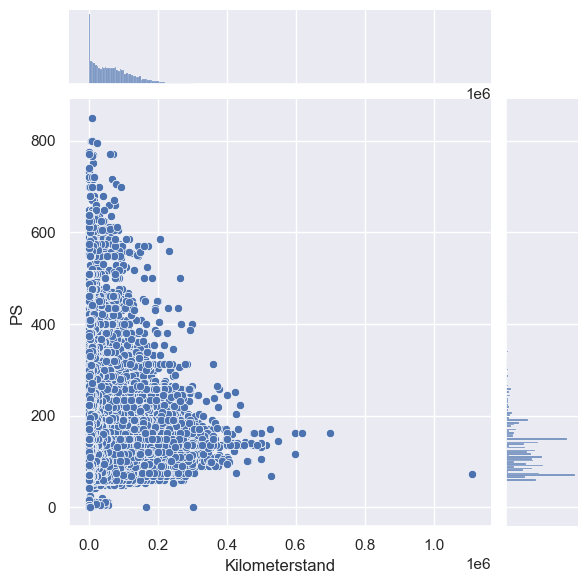

In [256]:
sns.jointplot(data = data, x='Kilometerstand', y='PS')

<Axes: xlabel='Kilometerstand', ylabel='PS'>

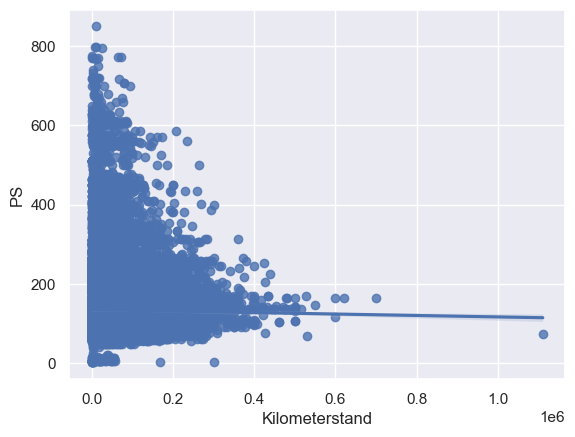

In [257]:
sns.regplot(data=data_num, x='Kilometerstand', y='PS', scatter=True, logx=False)

<Axes: xlabel='Kilometerstand', ylabel='Jahr'>

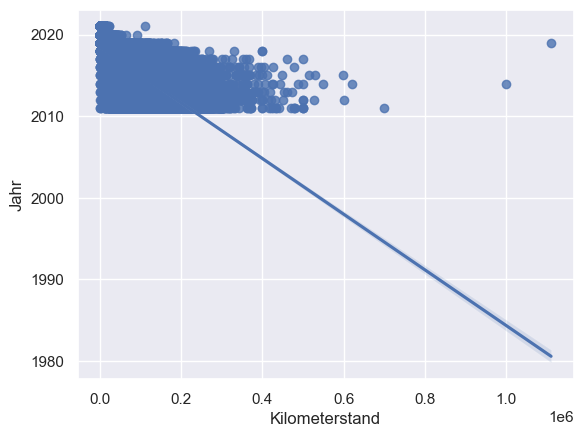

In [258]:
sns.regplot(data=data_num, x='Kilometerstand', y='Jahr', scatter=True, logx=False)

<Axes: xlabel='Kilometerstand', ylabel='Preis'>

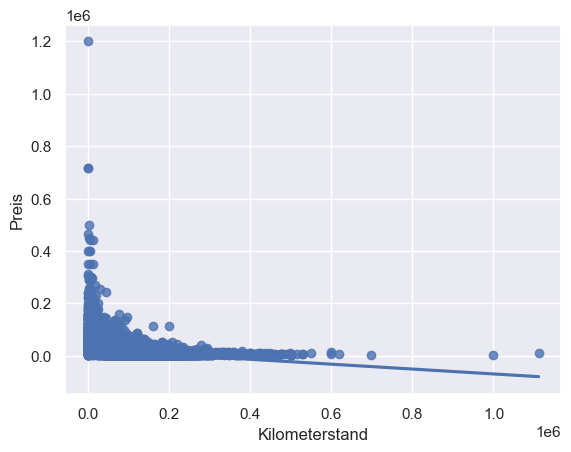

In [259]:
sns.regplot(data=data_num, x='Kilometerstand', y='Preis', scatter=True, logx=False)

<Axes: xlabel='Jahr', ylabel='PS'>

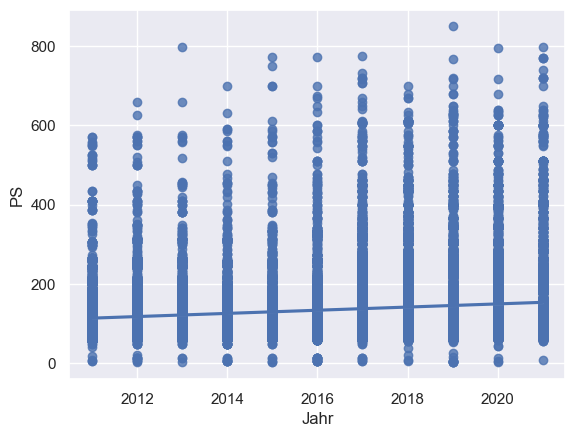

In [260]:
sns.regplot(data=data_num, x='Jahr', y='PS', scatter=True, logx=False)

<Axes: xlabel='Jahr', ylabel='Kilometerstand'>

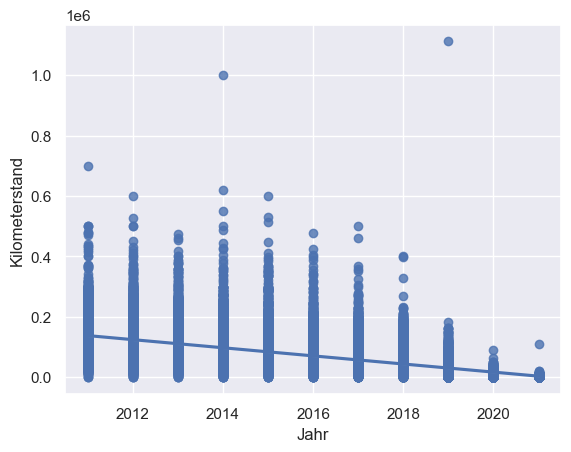

In [261]:
sns.regplot(data=data_num, x='Jahr', y='Kilometerstand', scatter=True, logx=False)

<Axes: xlabel='Jahr', ylabel='Preis'>

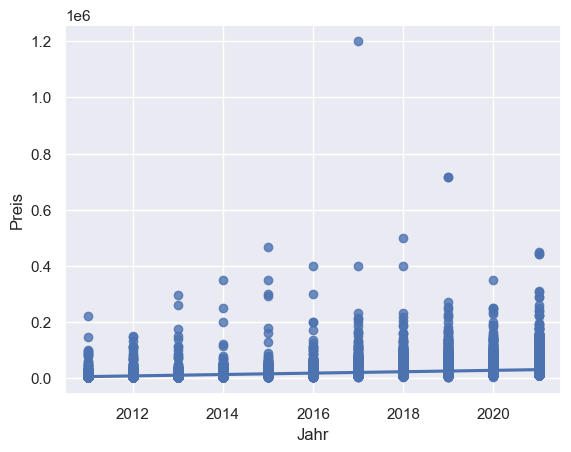

In [262]:
sns.regplot(data=data_num, x='Jahr', y='Preis', scatter=True, logx=False)

<Axes: xlabel='Preis', ylabel='PS'>

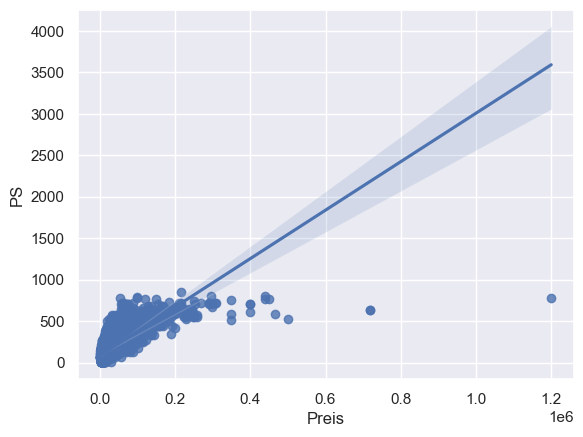

In [263]:
sns.regplot(data=data_num, x='Preis', y='PS', scatter=True, logx=False)

<Axes: xlabel='Preis', ylabel='Kilometerstand'>

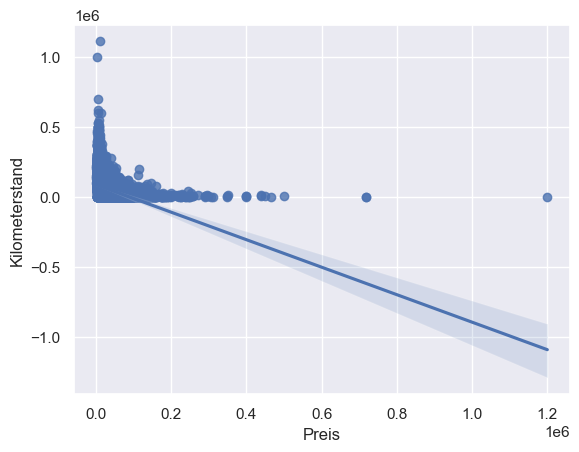

In [264]:
sns.regplot(data=data_num, x='Preis', y='Kilometerstand', scatter=True, logx=False)

<Axes: xlabel='Preis', ylabel='Jahr'>

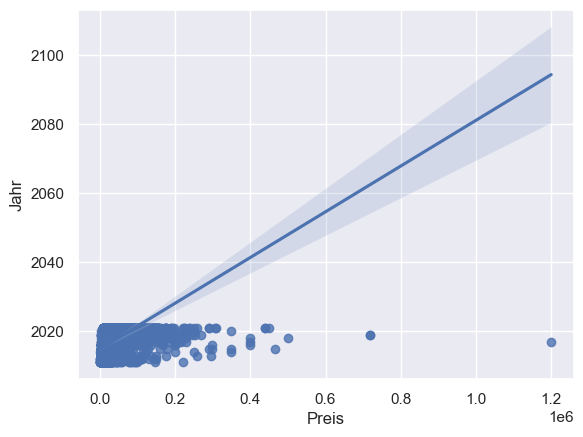

In [265]:
sns.regplot(data=data_num, x='Preis', y='Jahr', scatter=True, logx=False)

<Axes: xlabel='PS', ylabel='Preis'>

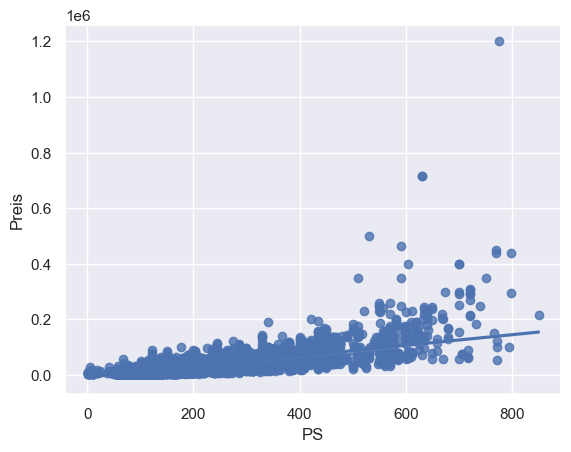

In [266]:
sns.regplot(data=data_num, x='PS', y='Preis', scatter=True, logx=False)

<Axes: xlabel='PS', ylabel='Kilometerstand'>

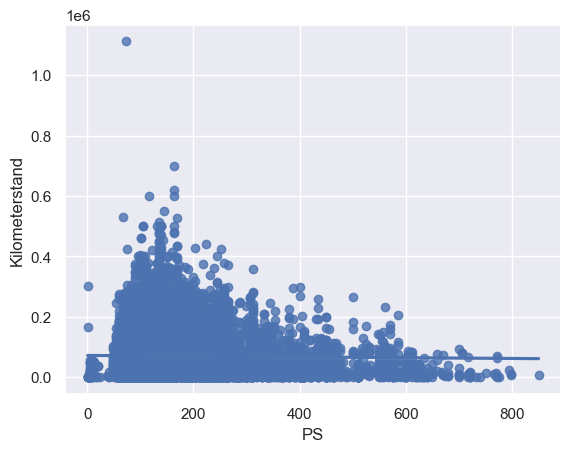

In [267]:
sns.regplot(data=data_num, x='PS', y='Kilometerstand', scatter=True, logx=False)

<Axes: xlabel='PS', ylabel='Jahr'>

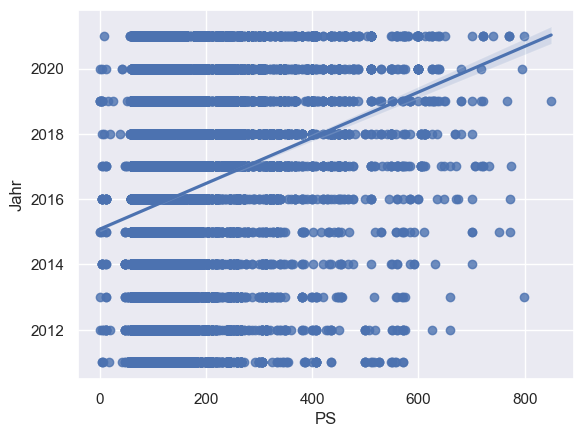

In [268]:
sns.regplot(data=data_num, x='PS', y='Jahr', scatter=True, logx=False)

<Axes: xlabel='Kilometerstand', ylabel='Density'>

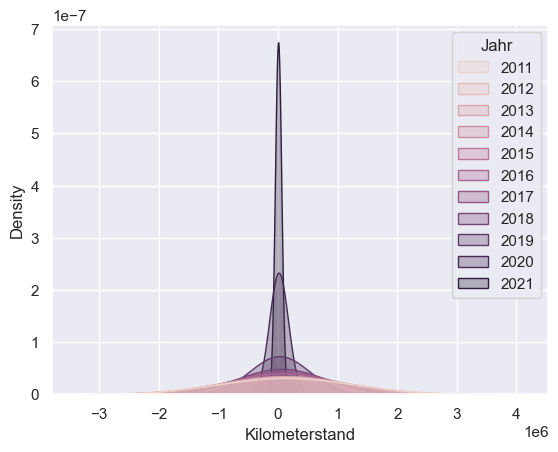

In [269]:
sns.kdeplot(data=data_num, x="Kilometerstand", hue="Jahr", 
            multiple="layer", fill=True, alpha=0.3, linewidth=1, bw_adjust=100)

<Axes: xlabel='Kilometerstand', ylabel='Proportion'>

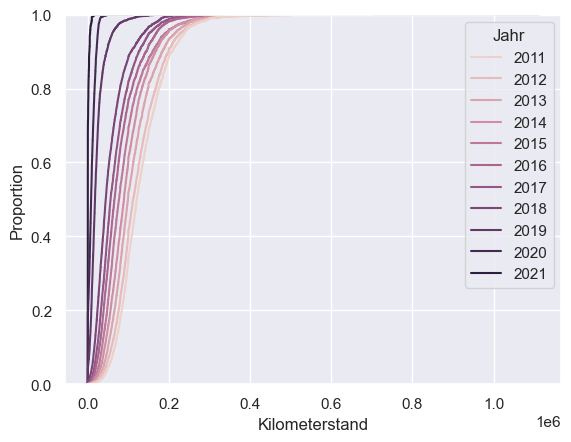

In [270]:
sns.ecdfplot(data=data_num, x="Kilometerstand", 
            hue="Jahr", stat="proportion")

<Axes: xlabel='Kilometerstand', ylabel='Count'>

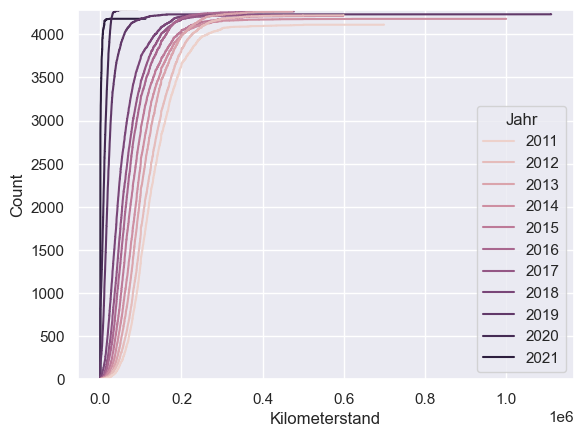

In [271]:
sns.ecdfplot(data=data_num, x="Kilometerstand", 
            hue="Jahr", stat="count")

<Axes: xlabel='PS', ylabel='Proportion'>

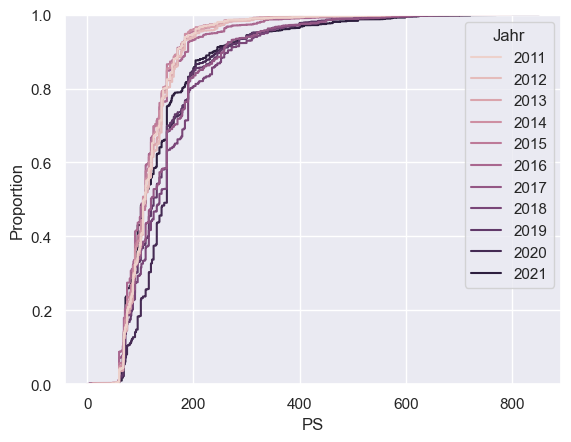

In [272]:
sns.ecdfplot(data=data_num, x="PS", 
            hue="Jahr", stat="proportion")

<Axes: xlabel='Preis', ylabel='Proportion'>

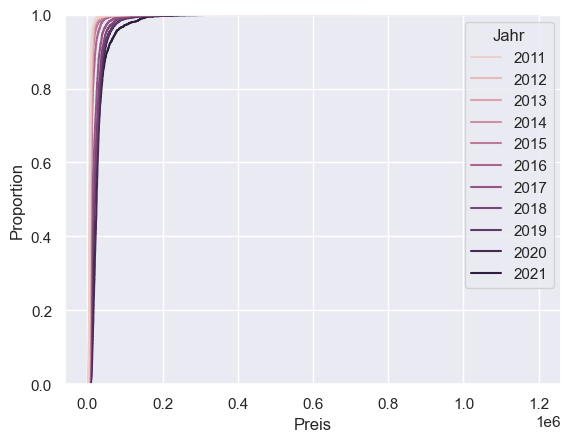

In [273]:
sns.ecdfplot(data=data_num, x="Preis", 
            hue="Jahr", stat="proportion")

<Axes: xlabel='PS', ylabel='Count'>

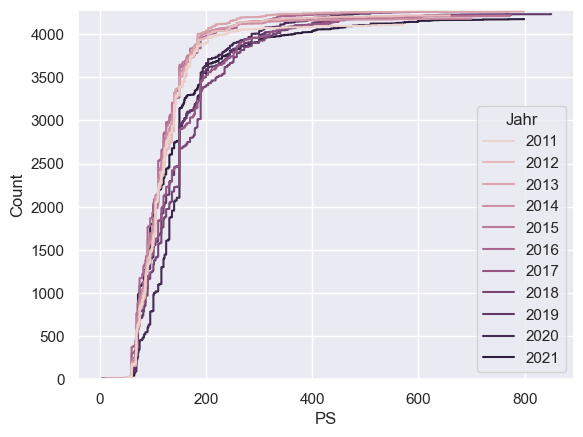

In [274]:
sns.ecdfplot(data=data_num, x="PS", 
            hue="Jahr", stat="count")

<Axes: xlabel='Preis', ylabel='Count'>

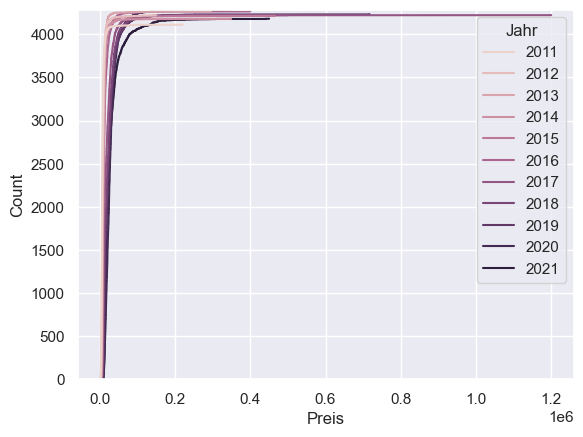

In [275]:
sns.ecdfplot(data=data_num, x="Preis", 
            hue="Jahr", stat="count")

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


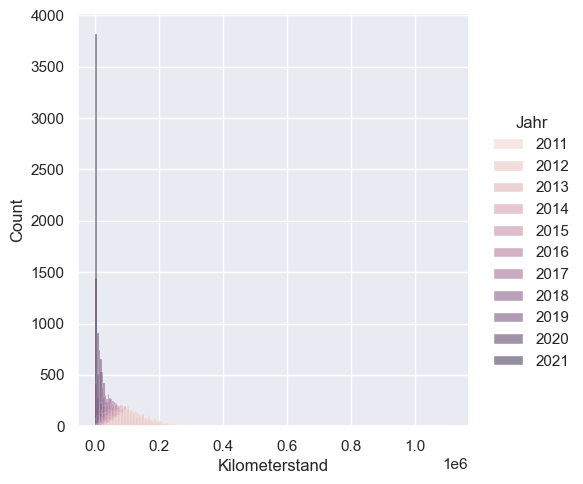

In [276]:
sns.displot(data=data_num, x="Kilometerstand", hue='Jahr', 
            kind="hist", multiple="layer")